<a href="https://colab.research.google.com/github/dickyanugerah/Data-Science-Learning/blob/main/EDA%20(Exploratory%20Data%20Analysis)%20Bank%20Churners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Statistic Understanding
## Case : Credit Card Customers (Predict Churning Customers)

### 1. Original data



In [ ]:
#Import Library
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#Churn vs. Normal 
counts = data.Attrition_Flag.value_counts()
normal = counts[0]
Churn = counts[1]
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))

There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%).


In [ ]:
# data.groupby(['Attrition_Flag'], as_index=True)
existing_data = data[(data.Attrition_Flag == 'Existing Customer')]
attrited_data = data[(data.Attrition_Flag == 'Attrited Customer')]
existing_data.head(), attrited_data.head()

(   CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
 0  768805383  Existing Customer  ...                1.625                 0.061
 1  818770008  Existing Customer  ...                3.714                 0.105
 2  713982108  Existing Customer  ...                2.333                 0.000
 3  769911858  Existing Customer  ...                2.333                 0.760
 4  709106358  Existing Customer  ...                2.500                 0.000
 
 [5 rows x 21 columns],
     CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
 21  708508758  Attrited Customer  ...                0.600                 0.000
 39  708300483  Attrited Customer  ...                0.143                 0.077
 51  779471883  Attrited Customer  ...                0.900                 0.562
 54  714374133  Attrited Customer  ...                0.364                 0.000
 61  712030833  Attrited Customer  ...                0.500                 0.

## Numerical : Measures of Central Tendency & Measures of Dispersion

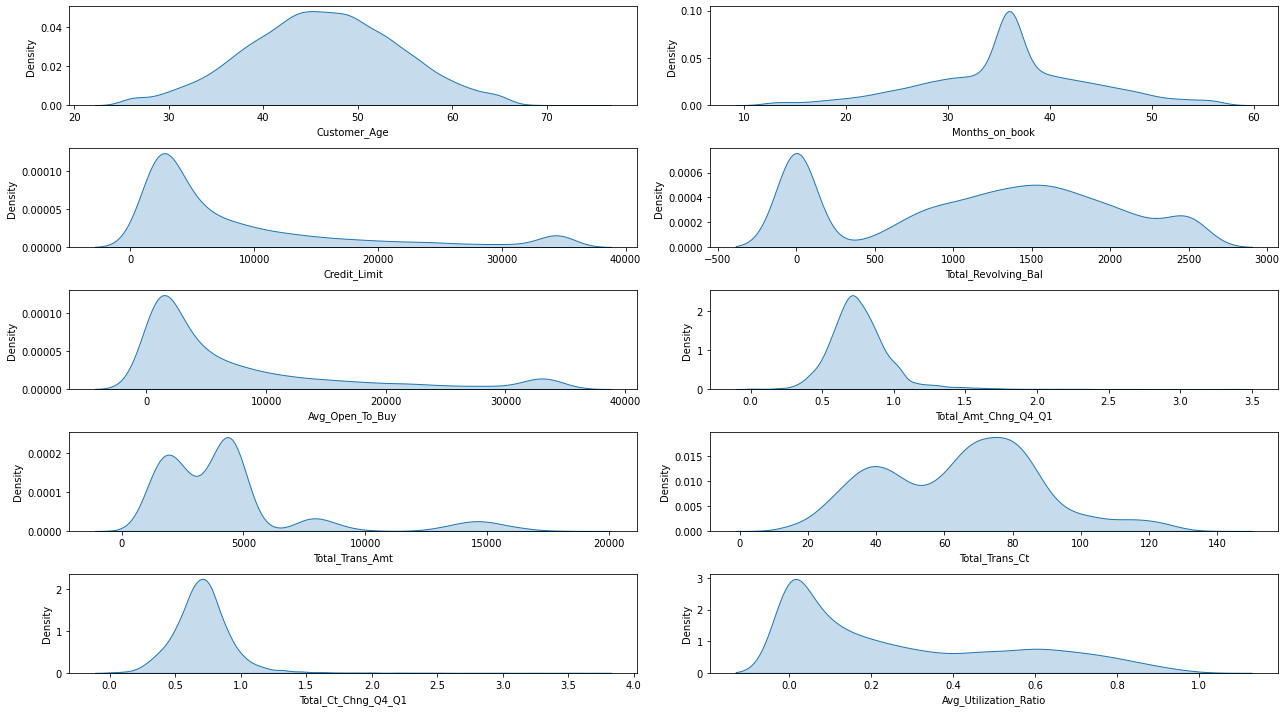

In [ ]:
num_cols = ['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
fig, axes = plt.subplots(5,2, figsize=(18,10))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

### Customer Age

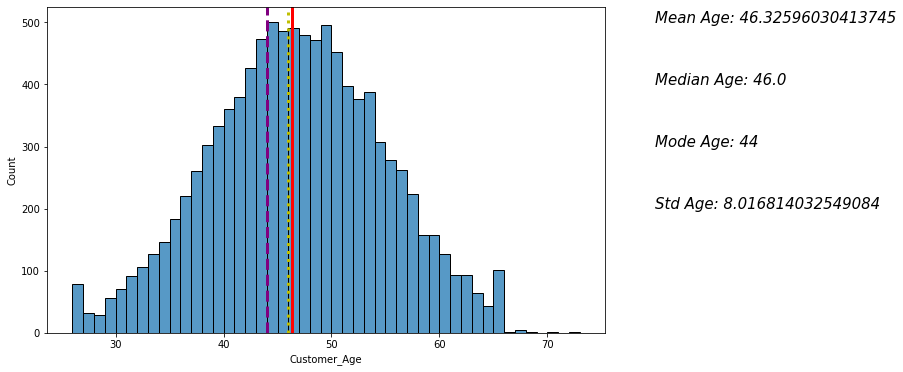

In [ ]:
# Distribution with Histplot

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Customer_Age', ax=ax)

plt.text(80, 200, "Std Age: " + str(data['Customer_Age'].std()), 
        style = 'italic', fontsize=15)
mode = data['Customer_Age'].mode()
plt.text(80, 300, "Mode Age: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(80, 400, "Median Age: " + str(data['Customer_Age'].median()), 
        style = 'italic', fontsize=15)
plt.text(80, 500, "Mean Age: " + str(data['Customer_Age'].mean()), 
        style = 'italic', fontsize=15)

average = data['Customer_Age'].mean()
median = data['Customer_Age'].median()
mode = data['Customer_Age'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

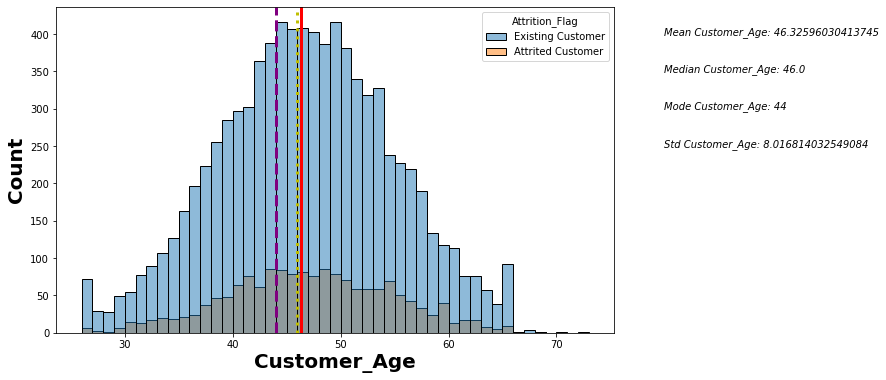

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', ax=ax)
plt.xlabel('Customer_Age', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(80, 250, "Std Customer_Age: " + str(data['Customer_Age'].std()), 
        style = 'italic', fontsize=10)
mode = data['Customer_Age'].mode()
plt.text(80, 300, "Mode Customer_Age: " + str(format(int(mode))), 
        style = 'italic', fontsize=10)
plt.text(80, 350, "Median Customer_Age: " + str(data['Customer_Age'].median()), 
        style = 'italic', fontsize=10)
plt.text(80, 400, "Mean Customer_Age: " + str(data['Customer_Age'].mean()), 
        style = 'italic', fontsize=10)

average = data['Customer_Age'].mean()
median = data['Customer_Age'].median()
mode = data['Customer_Age'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Months on book

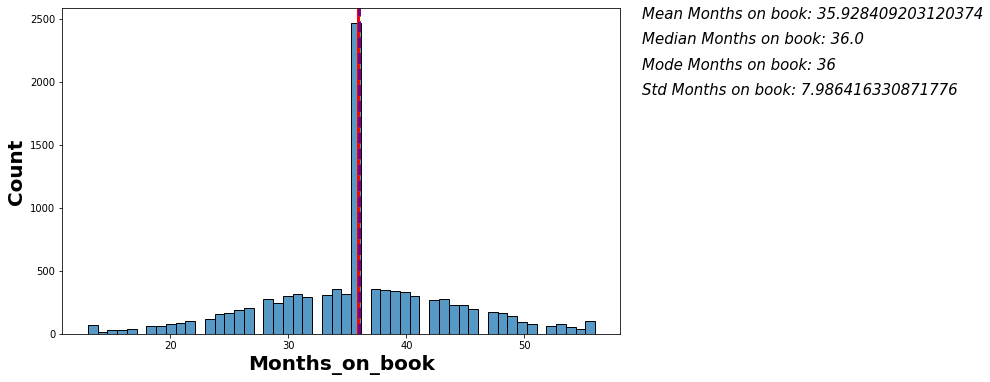

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Months_on_book',ax=ax)
plt.xlabel('Months_on_book', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(60, 1900, "Std Months on book: " + str(data['Months_on_book'].std()), 
        style = 'italic', fontsize=15)
mode = data['Months_on_book'].mode()
plt.text(60, 2100, "Mode Months on book: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(60, 2300, "Median Months on book: " + str(data['Months_on_book'].median()), 
        style = 'italic', fontsize=15)
plt.text(60, 2500, "Mean Months on book: " + str(data['Months_on_book'].mean()), 
        style = 'italic', fontsize=15)

average = data['Months_on_book'].mean()
median = data['Months_on_book'].median()
mode = data['Months_on_book'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

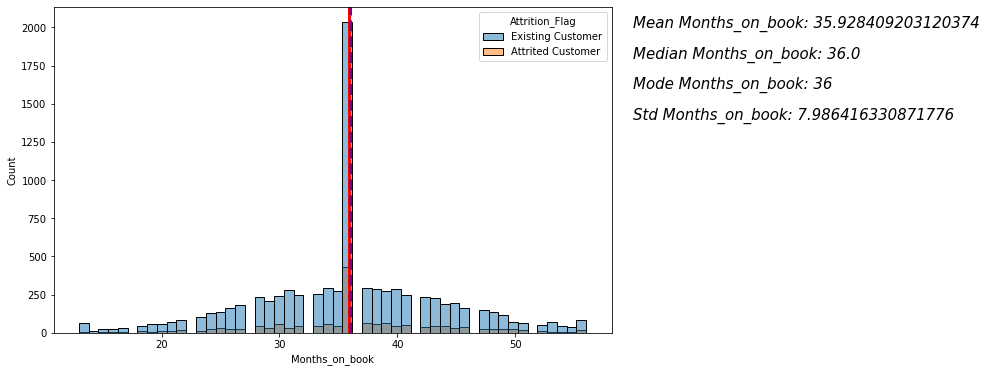

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Months_on_book', hue='Attrition_Flag', ax=ax)

plt.text(60, 1400, "Std Months_on_book: " + str(data['Months_on_book'].std()), 
        style = 'italic', fontsize=15)
mode = data['Months_on_book'].mode()
plt.text(60, 1600, "Mode Months_on_book: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(60, 1800, "Median Months_on_book: " + str(data['Months_on_book'].median()), 
        style = 'italic', fontsize=15)
plt.text(60, 2000, "Mean Months_on_book: " + str(data['Months_on_book'].mean()), 
        style = 'italic', fontsize=15)

average = data['Months_on_book'].mean()
median = data['Months_on_book'].median()
mode = data['Months_on_book'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Credit Limit

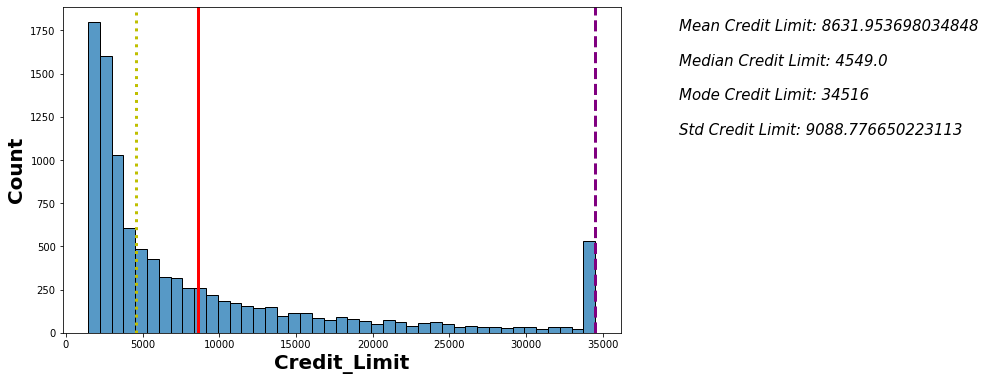

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Credit_Limit', ax=ax)
plt.xlabel('Credit_Limit', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(40000, 1150, "Std Credit Limit: " + str(data['Credit_Limit'].std()), 
        style = 'italic', fontsize=15)
mode = data['Credit_Limit'].mode()
plt.text(40000, 1350, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(40000, 1550, "Median Credit Limit: " + str(data['Credit_Limit'].median()), 
        style = 'italic', fontsize=15)
plt.text(40000, 1750, "Mean Credit Limit: " + str(data['Credit_Limit'].mean()), 
        style = 'italic', fontsize=15)

average = data['Credit_Limit'].mean()
median = data['Credit_Limit'].median()
mode = data['Credit_Limit'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

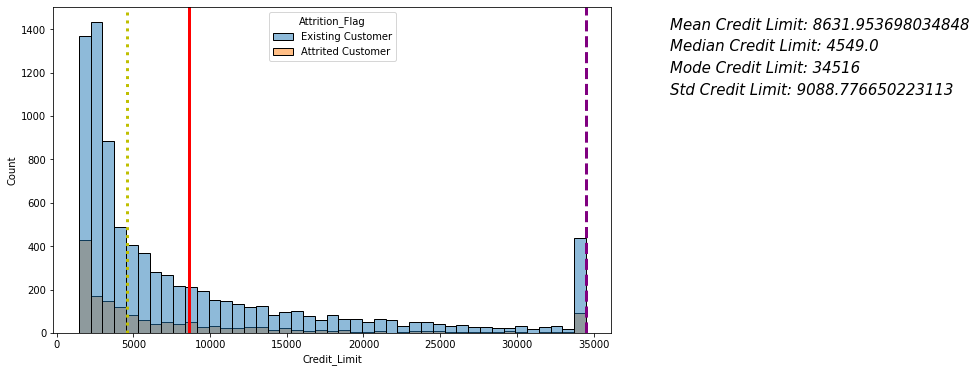

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Credit_Limit', hue='Attrition_Flag',ax=ax)

plt.text(40000, 1100, "Std Credit Limit: " + str(data['Credit_Limit'].std()), 
        style = 'italic', fontsize=15)
mode = data['Credit_Limit'].mode()
plt.text(40000, 1200, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(40000, 1300, "Median Credit Limit: " + str(data['Credit_Limit'].median()), 
        style = 'italic', fontsize=15)
plt.text(40000, 1400, "Mean Credit Limit: " + str(data['Credit_Limit'].mean()), 
        style = 'italic', fontsize=15)

average = data['Credit_Limit'].mean()
median = data['Credit_Limit'].median()
mode = data['Credit_Limit'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Revolving Balance

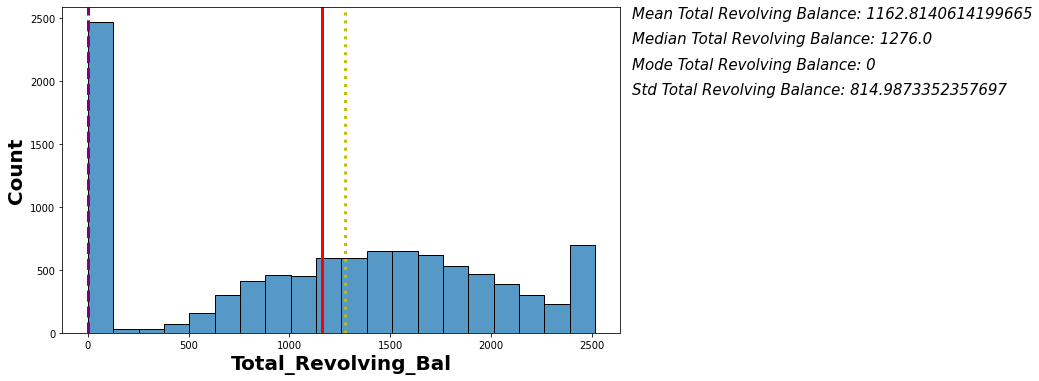

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Revolving_Bal', ax=ax)
plt.xlabel('Total_Revolving_Bal', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(2700, 1900, "Std Total Revolving Balance: " + str(data['Total_Revolving_Bal'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(2700, 2100, "Mode Total Revolving Balance: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(2700, 2300, "Median Total Revolving Balance: " + str(data['Total_Revolving_Bal'].median()), 
        style = 'italic', fontsize=15)
plt.text(2700, 2500, "Mean Total Revolving Balance: " + str(data['Total_Revolving_Bal'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Revolving_Bal'].mean()
median = data['Total_Revolving_Bal'].median()
mode = data['Total_Revolving_Bal'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

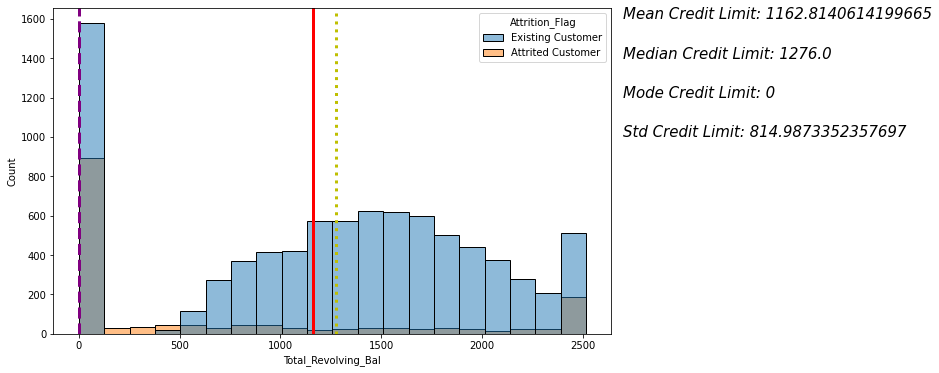

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Revolving_Bal', hue='Attrition_Flag', ax=ax)

plt.text(2700, 1000, "Std Credit Limit: " + str(data['Total_Revolving_Bal'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(2700, 1200, "Mode Credit Limit: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(2700, 1400, "Median Credit Limit: " + str(data['Total_Revolving_Bal'].median()), 
        style = 'italic', fontsize=15)
plt.text(2700, 1600, "Mean Credit Limit: " + str(data['Total_Revolving_Bal'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Revolving_Bal'].mean()
median = data['Total_Revolving_Bal'].median()
mode = data['Total_Revolving_Bal'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Average open to buy

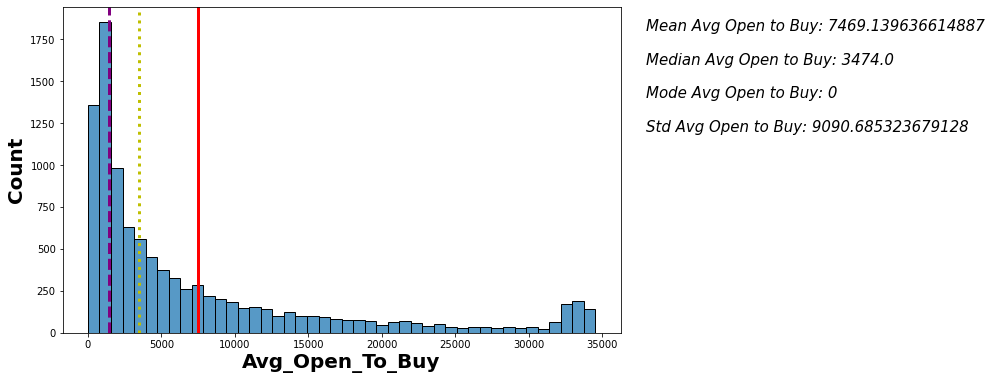

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Open_To_Buy', ax=ax)
plt.xlabel('Avg_Open_To_Buy', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)


plt.text(38000, 1200, "Std Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Revolving_Bal'].mode()
plt.text(38000, 1400, "Mode Avg Open to Buy: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(38000, 1600, "Median Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].median()), 
        style = 'italic', fontsize=15)
plt.text(38000, 1800, "Mean Avg Open to Buy: " + str(data['Avg_Open_To_Buy'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Open_To_Buy'].mean()
median = data['Avg_Open_To_Buy'].median()
mode = data['Avg_Open_To_Buy'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

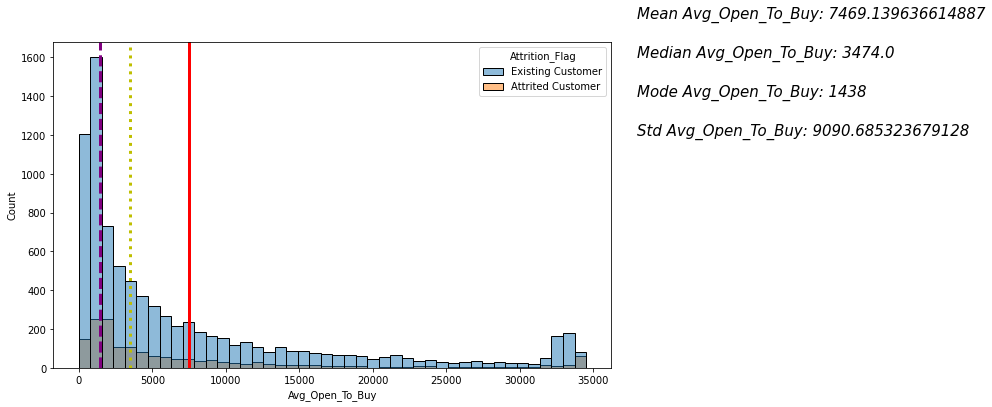

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Open_To_Buy', hue='Attrition_Flag', ax=ax)

plt.text(38000, 1200, "Std Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].std()), 
        style = 'italic', fontsize=15)
mode = data['Avg_Open_To_Buy'].mode()
plt.text(38000, 1400, "Mode Avg_Open_To_Buy: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(38000, 1600, "Median Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].median()), 
        style = 'italic', fontsize=15)
plt.text(38000, 1800, "Mean Avg_Open_To_Buy: " + str(data['Avg_Open_To_Buy'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Open_To_Buy'].mean()
median = data['Avg_Open_To_Buy'].median()
mode = data['Avg_Open_To_Buy'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Amount Change Q4 over Q1

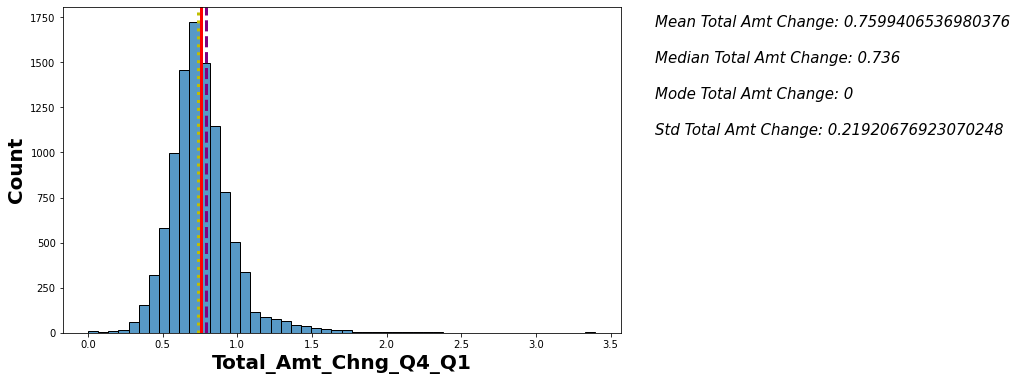

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1', bins=50, ax=ax)
plt.xlabel('Total_Amt_Chng_Q4_Q1', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(3.8, 1100, "Std Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Amt_Chng_Q4_Q1'].mode()
plt.text(3.8, 1300, "Mode Total Amt Change: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(3.8, 1500, "Median Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(3.8, 1700, "Mean Total Amt Change: " + str(data['Total_Amt_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Amt_Chng_Q4_Q1'].mean()
median = data['Total_Amt_Chng_Q4_Q1'].median()
mode = data['Total_Amt_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

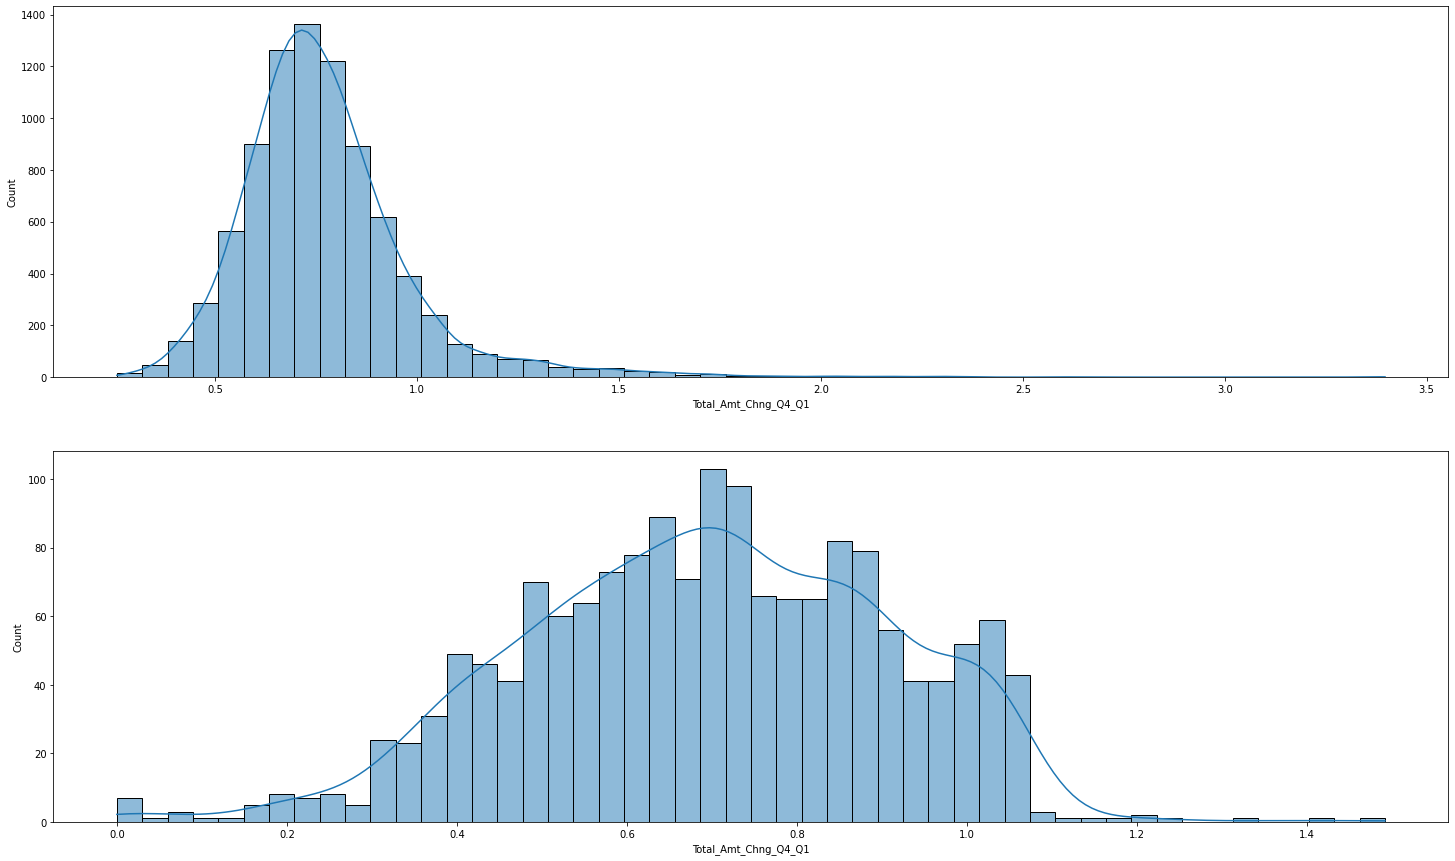

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
sns.histplot(data=existing_data, x='Total_Amt_Chng_Q4_Q1', kde=True, bins=50, ax=axes[0])
sns.histplot(data=attrited_data, x='Total_Amt_Chng_Q4_Q1', kde=True,bins=50 , ax=axes[1])
plt.show()

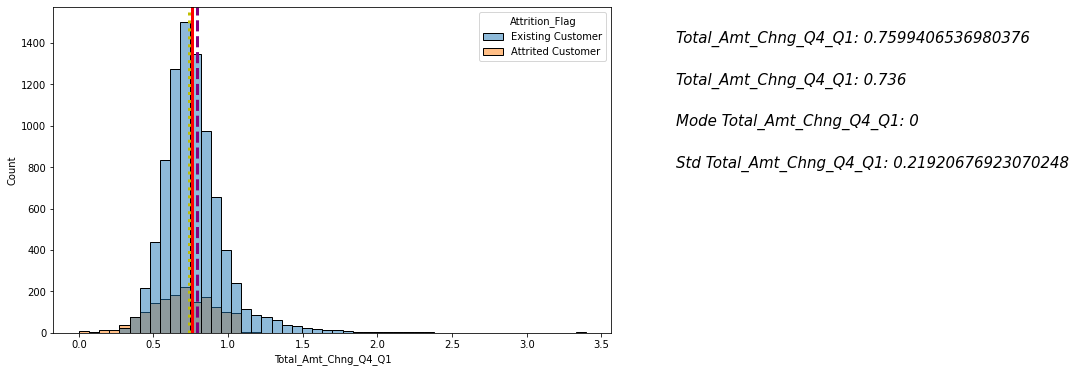

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', bins=50, ax=ax)

plt.text(4, 800, "Std Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Amt_Chng_Q4_Q1'].mode()
plt.text(4, 1000, "Mode Total_Amt_Chng_Q4_Q1: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(4, 1200, "Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(4, 1400, "Total_Amt_Chng_Q4_Q1: " + str(data['Total_Amt_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Amt_Chng_Q4_Q1'].mean()
median = data['Total_Amt_Chng_Q4_Q1'].median()
mode = data['Total_Amt_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Transaction Amount

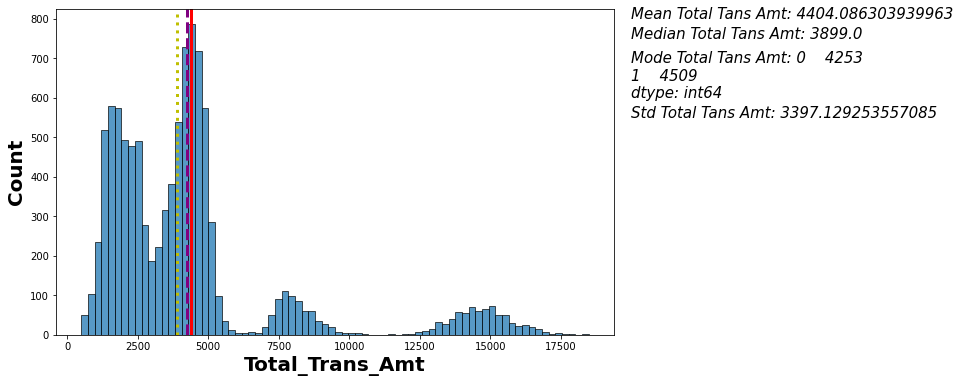

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Trans_Amt', ax=ax)
plt.xlabel('Total_Trans_Amt', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(20000, 550, "Std Total Tans Amt: " + str(data['Total_Trans_Amt'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Trans_Amt'].mode()
plt.text(20000, 600, "Mode Total Tans Amt: " + str((mode)), 
        style = 'italic', fontsize=15)
plt.text(20000, 750, "Median Total Tans Amt: " + str(data['Total_Trans_Amt'].median()), 
        style = 'italic', fontsize=15)
plt.text(20000, 800, "Mean Total Tans Amt: " + str(data['Total_Trans_Amt'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Trans_Amt'].mean()
median = data['Total_Trans_Amt'].median()
mode = data['Total_Trans_Amt'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Transaction Count

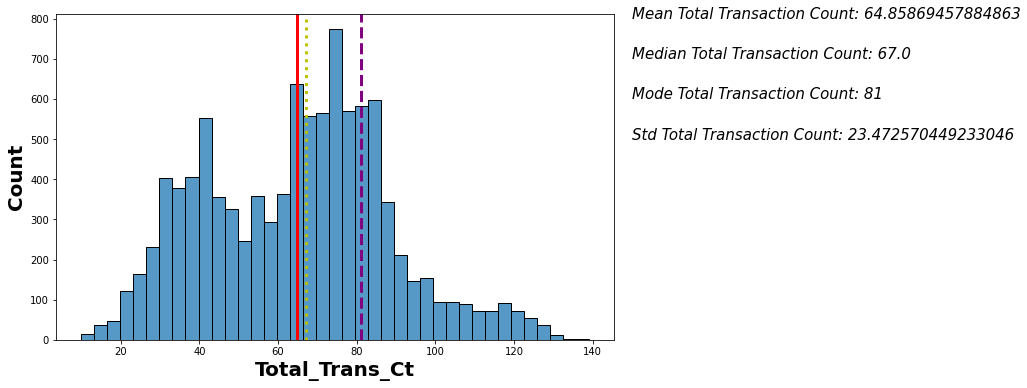

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Trans_Ct', ax=ax)
plt.xlabel('Total_Trans_Ct', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(150, 500, "Std Total Transaction Count: " + str(data['Total_Trans_Ct'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Trans_Ct'].mode()
plt.text(150, 600, "Mode Total Transaction Count: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(150, 700, "Median Total Transaction Count: " + str(data['Total_Trans_Ct'].median()), 
        style = 'italic', fontsize=15)
plt.text(150, 800, "Mean Total Transaction Count: " + str(data['Total_Trans_Ct'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Trans_Ct'].mean()
median = data['Total_Trans_Ct'].median()
mode = data['Total_Trans_Ct'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Total Change in Transaction Count (Q4 over Q1)

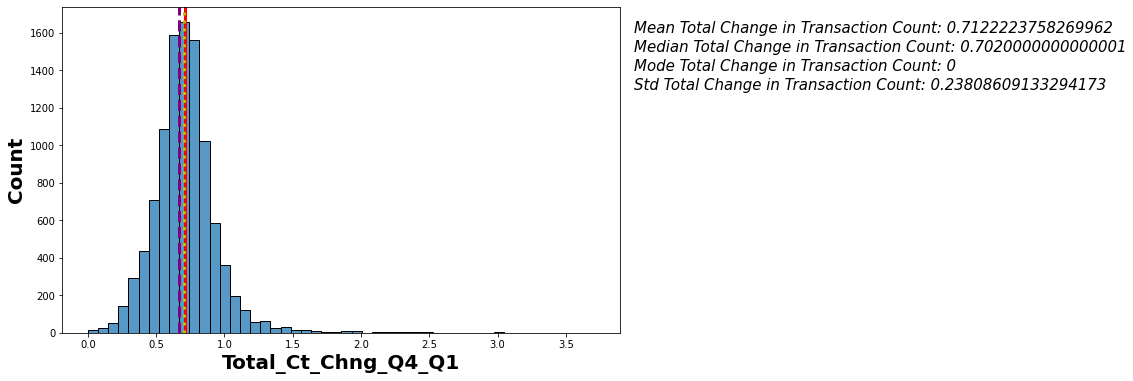

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Total_Ct_Chng_Q4_Q1',bins=50, ax=ax)
plt.xlabel('Total_Ct_Chng_Q4_Q1', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(4, 1300, "Std Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].std()), 
        style = 'italic', fontsize=15)
mode = data['Total_Ct_Chng_Q4_Q1'].mode()
plt.text(4, 1400, "Mode Total Change in Transaction Count: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(4, 1500, "Median Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].median()), 
        style = 'italic', fontsize=15)
plt.text(4, 1600, "Mean Total Change in Transaction Count: " + str(data['Total_Ct_Chng_Q4_Q1'].mean()), 
        style = 'italic', fontsize=15)

average = data['Total_Ct_Chng_Q4_Q1'].mean()
median = data['Total_Ct_Chng_Q4_Q1'].median()
mode = data['Total_Ct_Chng_Q4_Q1'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

### Average Utilization Ratio

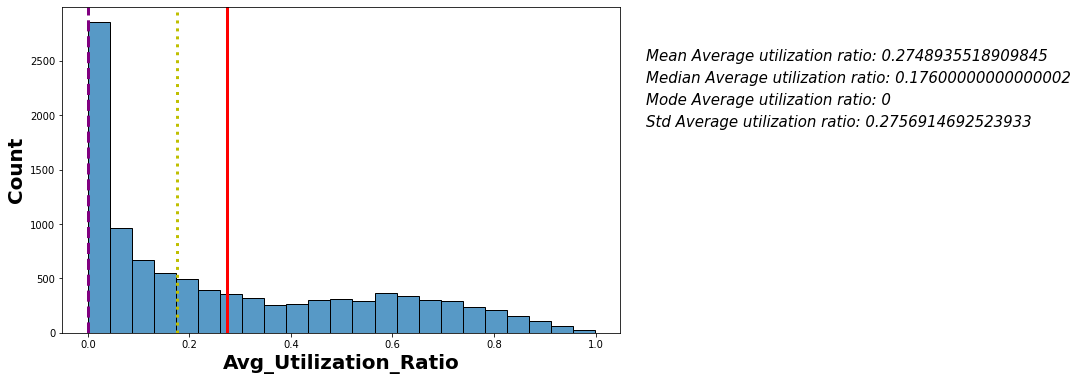

In [ ]:
# Distribution with Histplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, x='Avg_Utilization_Ratio', ax=ax)
plt.xlabel('Avg_Utilization_Ratio', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)

plt.text(1.1, 1900, "Std Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].std()), 
        style = 'italic', fontsize=15)
mode = data['Avg_Utilization_Ratio'].mode()
plt.text(1.1, 2100, "Mode Average utilization ratio: " + str(format(int(mode))), 
        style = 'italic', fontsize=15)
plt.text(1.1, 2300, "Median Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].median()), 
        style = 'italic', fontsize=15)
plt.text(1.1, 2500, "Mean Average utilization ratio: " + str(data['Avg_Utilization_Ratio'].mean()), 
        style = 'italic', fontsize=15)

average = data['Avg_Utilization_Ratio'].mean()
median = data['Avg_Utilization_Ratio'].median()
mode = data['Avg_Utilization_Ratio'].mode()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()

## 3. Categorical : Proportion
Conclusion : 
Kemungkinan variabel yang punya pengaruh pada attrition customer:
1. Contacts count 12 month
2. Months inactive 12 month

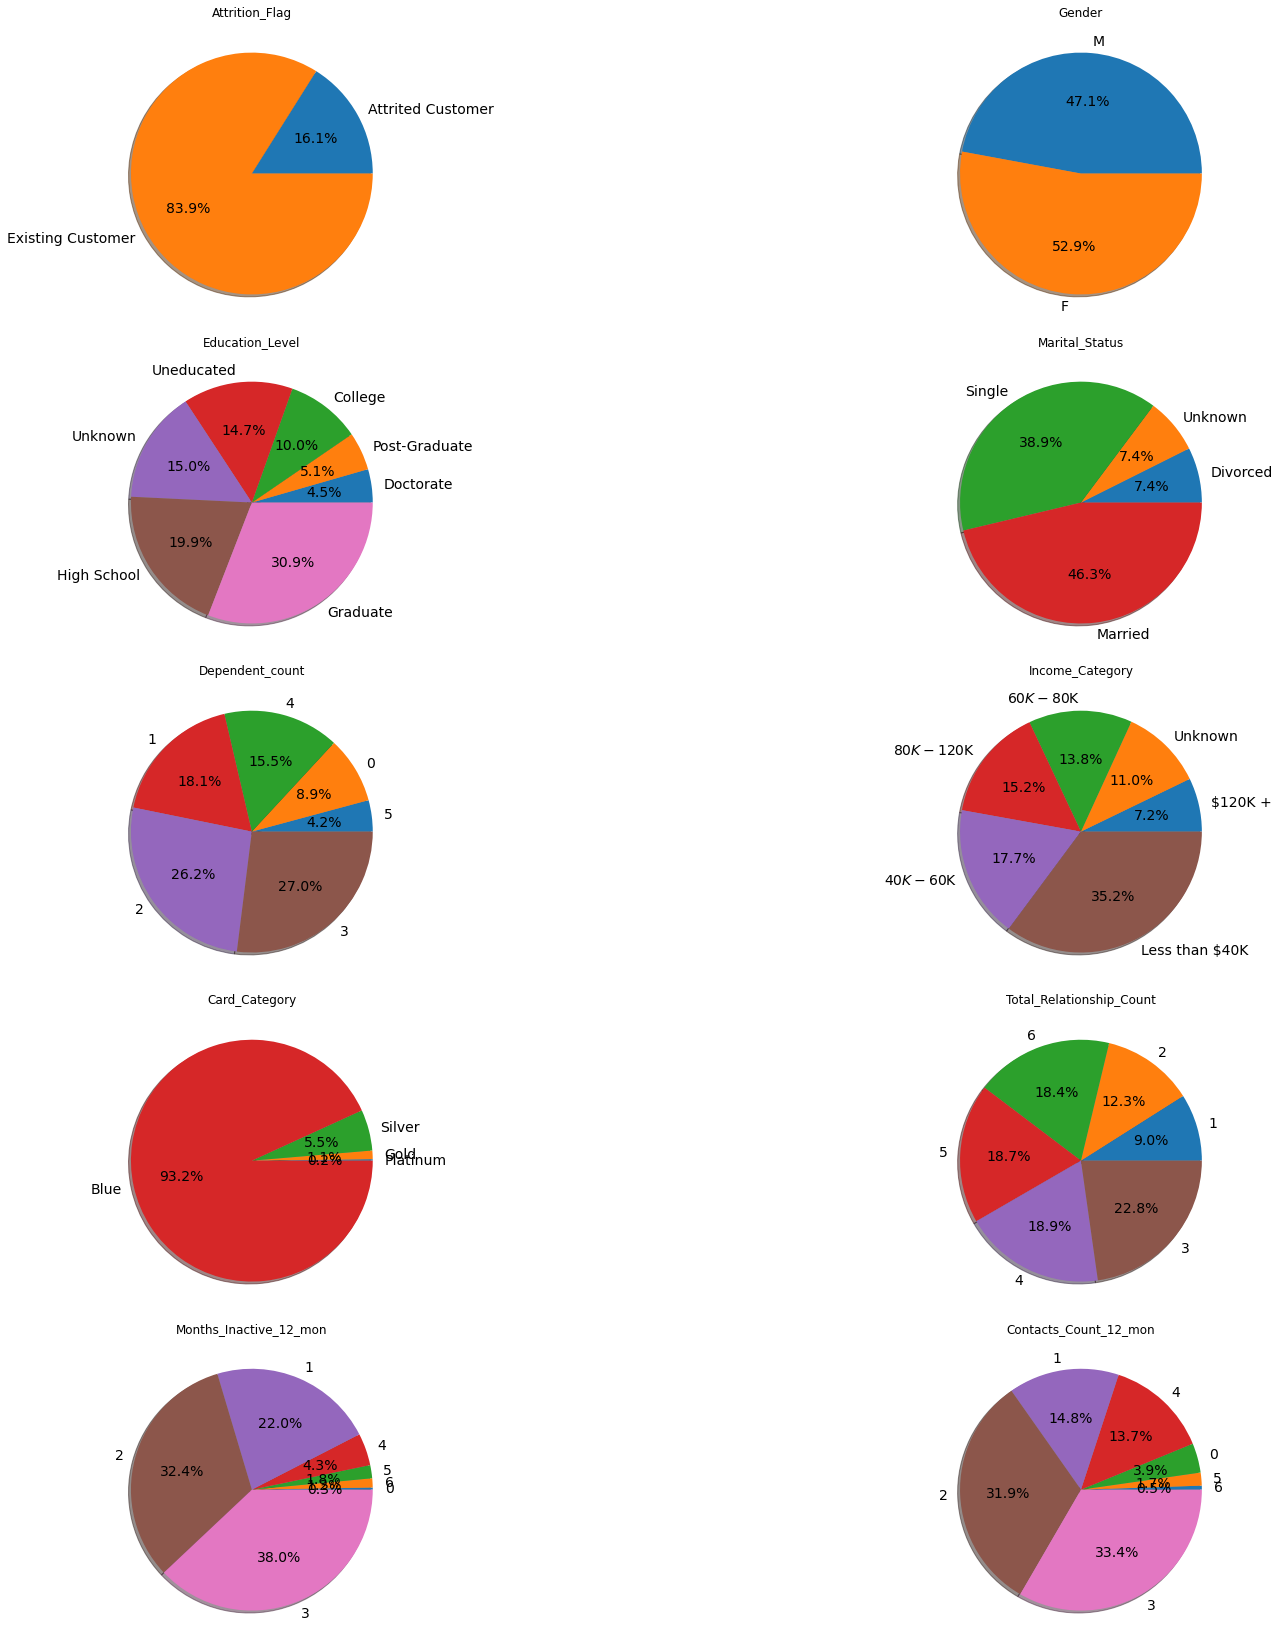

In [ ]:
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Dependent_count','Income_Category', 'Card_Category', 'Total_Relationship_Count',
            'Months_Inactive_12_mon','Contacts_Count_12_mon']

fig, axes = plt.subplots(5,2, figsize=(29,23))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie',ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

### Attrition Flag

In [ ]:
# Proportion of Attrition Flag
proportion = pd.DataFrame(data['Attrition_Flag'].value_counts())
proportion = proportion.rename(columns={'Attrition_Flag':'Amount'})
proportion['Proportion(%)'] = data['Attrition_Flag'].value_counts(normalize=True)
proportion = proportion.rename_axis('Attrition Flag').reset_index()

# show the five first rows
proportion.head()

,Attrition Flag,Amount,Proportion(%)
0,Existing Customer,8500,0.83934
1,Attrited Customer,1627,0.16066


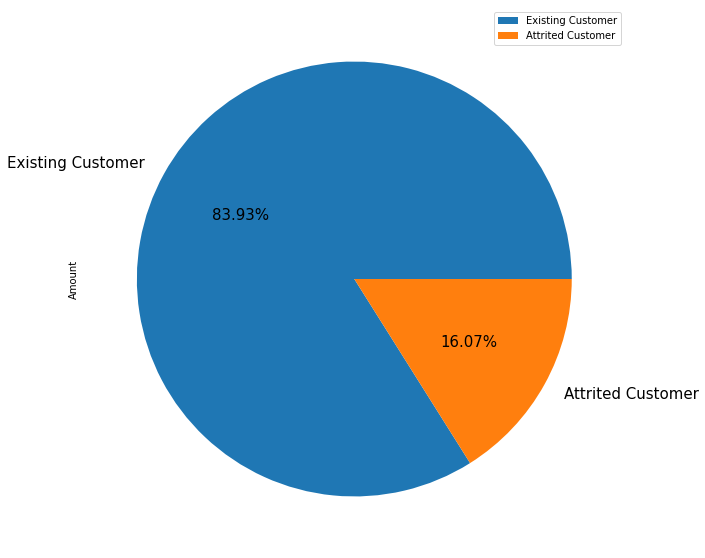

In [ ]:
attrition = pd.DataFrame(data['Attrition_Flag'].value_counts())
attrition = attrition.rename(columns={'Attrition_Flag':'Amount'})
attrition['Proportion']=data['Attrition_Flag'].value_counts(normalize=True)
attrition['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.legend(['Existing Customer', 'Attrited Customer'])
plt.show()

### Gender

In [ ]:
# Proportion of Gender
proportion = pd.DataFrame(data['Gender'].value_counts())
proportion = proportion.rename(columns={'Gender':'Amount'})
proportion['Proportion(%)'] = data['Gender'].value_counts(normalize=True)
proportion = proportion.rename_axis('Gender').reset_index()

# show the five first rows
proportion.head()

,Gender,Amount,Proportion(%)
0,F,5358,0.529081
1,M,4769,0.470919


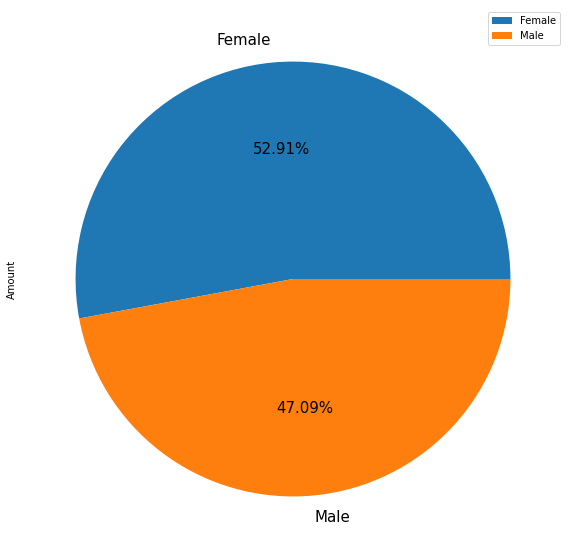

In [ ]:
gender = pd.DataFrame(data['Gender'].value_counts())
gender = gender.rename(columns={'Gender':'Amount'})
gender = gender.rename(index={'F': 'Female', 'M':'Male'})
gender['Proportion']=data['Gender'].value_counts(normalize=True)
gender['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.legend(['Female', 'Male'])
plt.show()

,Existing Customer by Gender
F,4428
M,4072


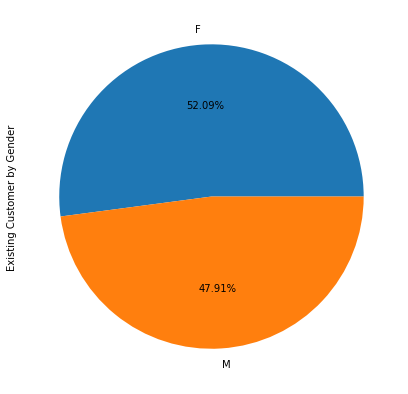

In [ ]:
# Existing Customer from Gender Variable
Existing_gender = pd.DataFrame(existing_data['Gender'].value_counts())
df_new = Existing_gender.rename(columns={'Gender': 'Existing Customer by Gender'})
display(df_new)

df_new['Existing Customer by Gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Attrition Customer by Gender
F,930
M,697


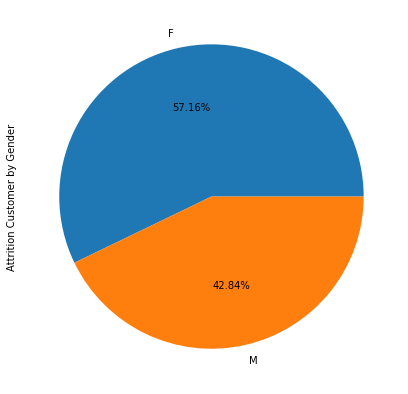

In [ ]:
# Attrited Customer from Gender Variable
attrited_gender = pd.DataFrame(attrited_data['Gender'].value_counts())
df_new = attrited_gender.rename(columns={'Gender': 'Attrition Customer by Gender'})
display(df_new)

df_new['Attrition Customer by Gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

### Educational Level



In [ ]:
# Proportion of Educational Level
proportion = pd.DataFrame(data['Education_Level'].value_counts())
proportion = proportion.rename(columns={'Education_Level':'Amount'})
proportion['Proportion(%)'] = data['Education_Level'].value_counts(normalize=True)
proportion = proportion.rename_axis('Education Level').reset_index()

# show the five first rows
proportion.head()

,Education Level,Amount,Proportion(%)
0,Graduate,3128,0.308877
1,High School,2013,0.198776
2,Unknown,1519,0.149995
3,Uneducated,1487,0.146835
4,College,1013,0.100030


,Education_Level,Amount,Proportion(%)
0,Graduate,3128,0.308877
1,High School,2013,0.198776
2,Unknown,1519,0.149995
3,Uneducated,1487,0.146835
4,College,1013,0.100030


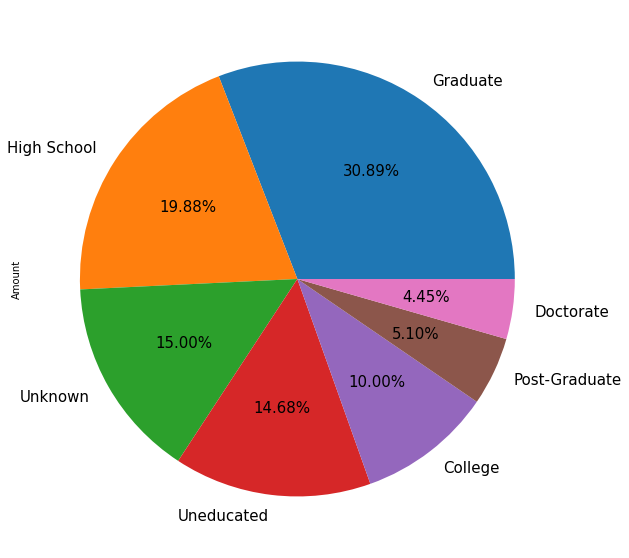

In [ ]:
gender = pd.DataFrame(data['Education_Level'].value_counts())
gender = gender.rename(columns={'Education_Level':'Amount'})
gender['Proportion']=data['Education_Level'].value_counts(normalize=True)
gender['Amount'].plot(kind='pie',figsize=(15,10), autopct='%1.2f%%', fontsize=15)

plt.show()

,Education_Level
Graduate,2641
High School,1707
Unknown,1263
Uneducated,1250
College,859
Post-Graduate,424
Doctorate,356


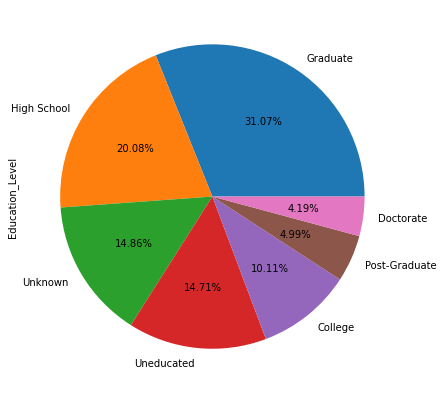

In [ ]:
# Existing Customer from Gender Variable
existing_EL = pd.DataFrame(existing_data['Education_Level'].value_counts())
display(existing_EL)

existing_EL['Education_Level'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Education_Level
Graduate,487
High School,306
Unknown,256
Uneducated,237
College,154
Post-Graduate,92
Doctorate,95


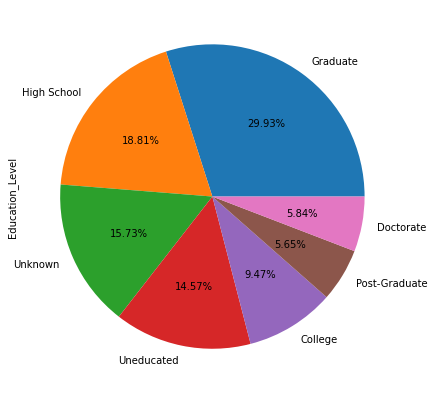

In [ ]:
# Attrited Customer from Gender Variable
attrited_gender = pd.DataFrame(attrited_data['Education_Level'].value_counts())
#df1 = attrited_gender.rename(columns={'Education_Level': 'Attrition Customer by Education_Level'})
df1 = df.reindex(['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'])
display(df1)

df1['Education_Level'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Education_Level
Graduate,2641
High School,1707
Unknown,1263
Uneducated,1250
College,859
Post-Graduate,424
Doctorate,356


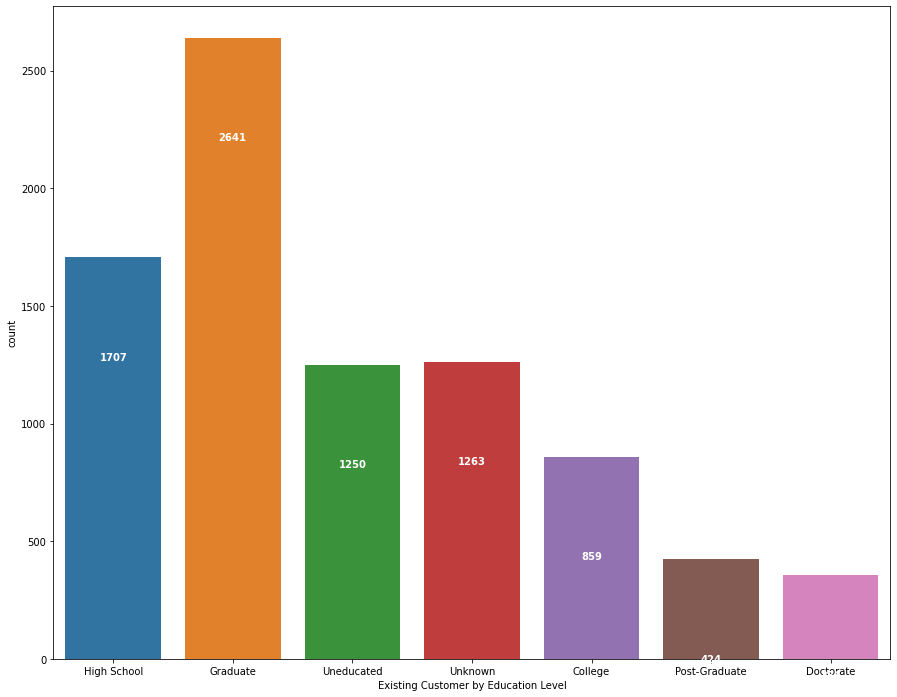

In [ ]:
# Existing customer from IC Variable
existing_EL = pd.DataFrame(existing_data['Education_Level'].value_counts())
display(existing_EL)

df_new = existing_data.rename(columns={'Education_Level': 'Existing Customer by Education Level'})
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
sns.countplot(data=df_new, x='Existing Customer by Education Level')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()
plt.show()

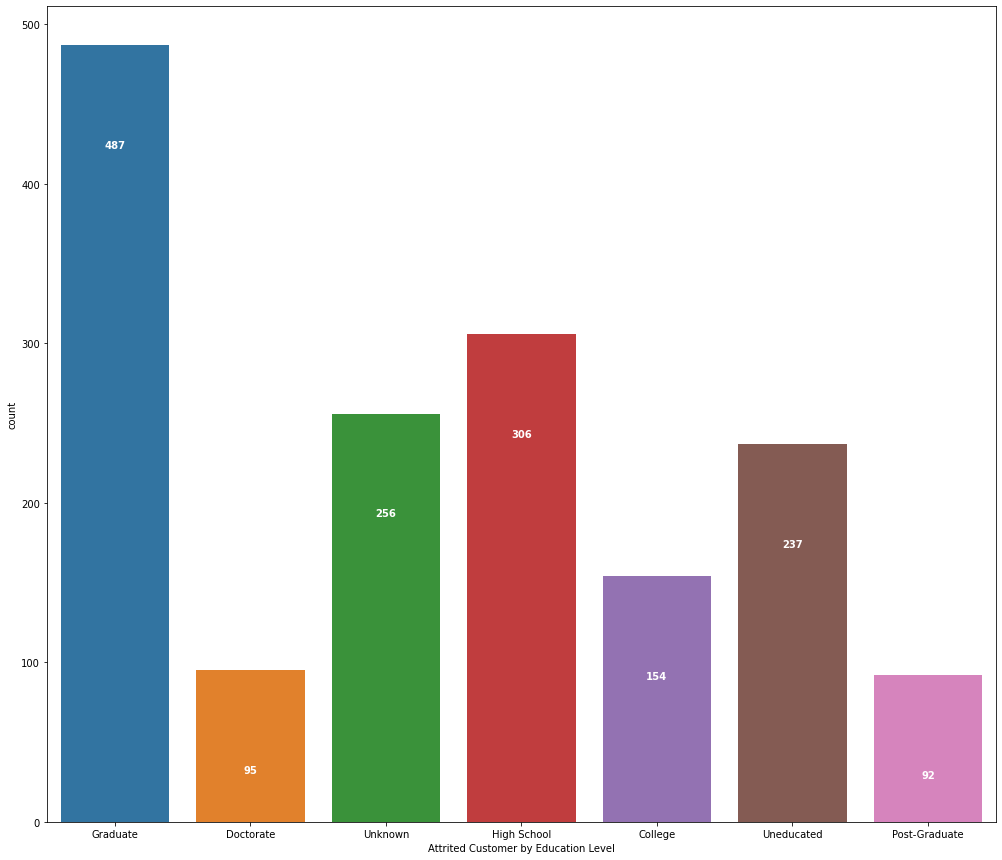

In [ ]:
# Attrited customer from EL Variable
df_new = attrited_data.rename(columns={'Education_Level': 'Attrited Customer by Education Level'})
fig, ax = plt.subplots(1, 1, figsize=(17, 15))
sns.countplot(data=df_new, x='Attrited Customer by Education Level')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

### Marital Status

In [ ]:
# # Proportion of Educational Level
proportion = pd.DataFrame(data['Marital_Status'].value_counts())
proportion = proportion.rename(columns={'Marital_Status':'Amount'})
proportion['Proportion(%)'] = data['Marital_Status'].value_counts(normalize=True)
proportion = proportion.rename_axis('Marital_Status').reset_index()

# show the five first rows
proportion.head()

,Marital_Status,Amount,Proportion(%)
0,Married,4687,0.462822
1,Single,3943,0.389355
2,Unknown,749,0.073961
3,Divorced,748,0.073862


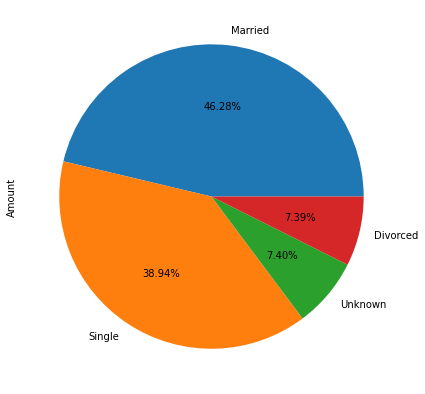

In [ ]:
marital = pd.DataFrame(data['Marital_Status'].value_counts())
marital = marital.rename(columns={'Marital_Status':'Amount'})
marital['Proportion']=data['Marital_Status'].value_counts(normalize=True)
marital['Amount'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Marital_Status
Married,3978
Single,3275
Unknown,620
Divorced,627


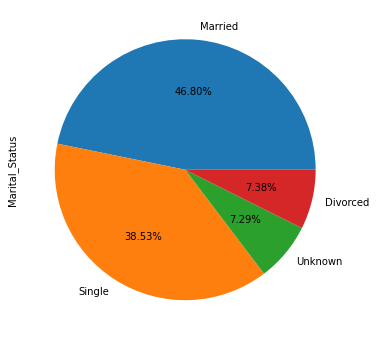

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(existing_data['Marital_Status'].value_counts())
df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(df1)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

df1['Marital_Status'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

,Attrited Customer by Marital Status
Married,709
Single,668
Unknown,129
Divorced,121


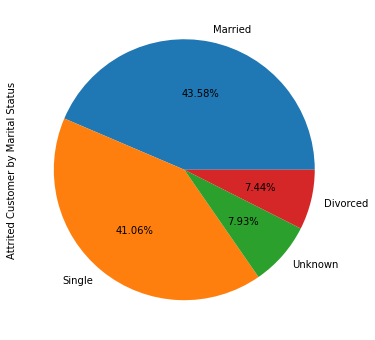

In [ ]:
# Attrited customer from Marital status Variable
Attrited_MS = pd.DataFrame(attrited_data['Marital_Status'].value_counts())
df_new = Attrited_MS.rename(columns={'Marital_Status': 'Attrited Customer by Marital Status'})
display(df_new)

df_new['Attrited Customer by Marital Status'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

### Income Category

In [ ]:
# # Proportion of Income Category
proportion = pd.DataFrame(data['Income_Category'].value_counts())
proportion = proportion.rename(columns={'Income_Category':'Amount'})
proportion['Proportion(%)'] = data['Income_Category'].value_counts(normalize=True)
proportion = proportion.rename_axis('Income_Category').reset_index()

# show the five first rows
proportion.head()

,Income_Category,Amount,Proportion(%)
0,Less than $40K,3561,0.351634
1,$40K - $60K,1790,0.176755
2,$80K - $120K,1535,0.151575
3,$60K - $80K,1402,0.138442
4,Unknown,1112,0.109805


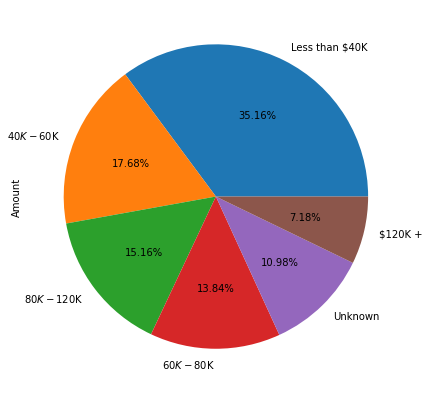

In [ ]:
income = pd.DataFrame(data['Income_Category'].value_counts())
income = income.rename(columns={'Income_Category':'Amount'})
income['Proportion']=data['Income_Category'].value_counts(normalize=True)
income['Amount'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
plt.show()

,Income_Category
Less than $40K,2949
$40K - $60K,1519
$80K - $120K,1293
$60K - $80K,1213
Unknown,925
$120K +,601


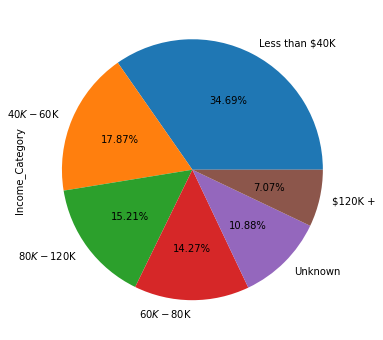

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(existing_data['Income_Category'].value_counts())
#df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(Existing_MS)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

Existing_MS['Income_Category'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

,Income_Category
Less than $40K,612
$40K - $60K,271
$80K - $120K,242
$60K - $80K,189
Unknown,187
$120K +,126


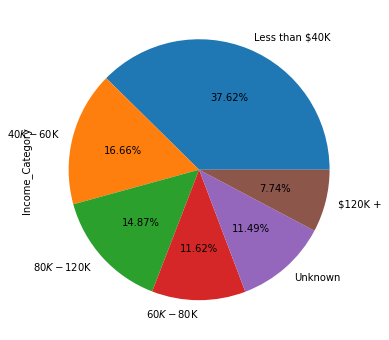

In [ ]:
# Existing customer from Marital status Variable
Existing_MS = pd.DataFrame(attrited_data['Income_Category'].value_counts())
#df1 = Existing_MS.reindex(['Married','Single','Unknown','Divorced'])
display(Existing_MS)
#df_new = Existing_MS.rename(columns={'Marital_Status': 'Existing Customer by Marital Status'})

Existing_MS['Income_Category'].plot(kind='pie',figsize=(11,6), autopct='%1.2f%%')
plt.show()

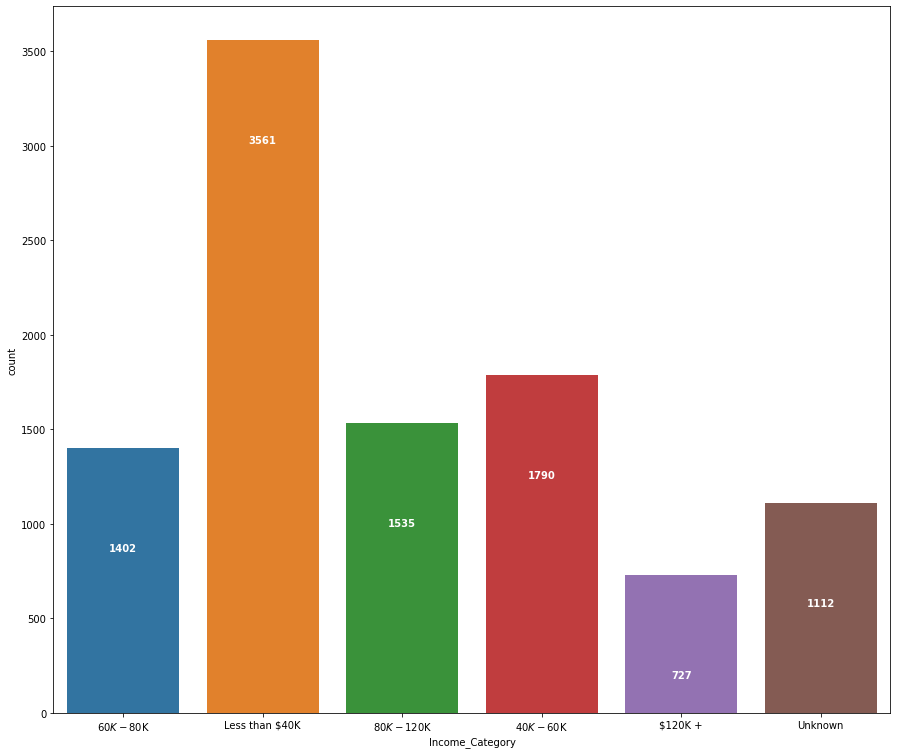

In [ ]:
#countplot
fig, ax = plt.subplots(1, 1, figsize=(15, 13))
sns.countplot(data=data, x='Income_Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

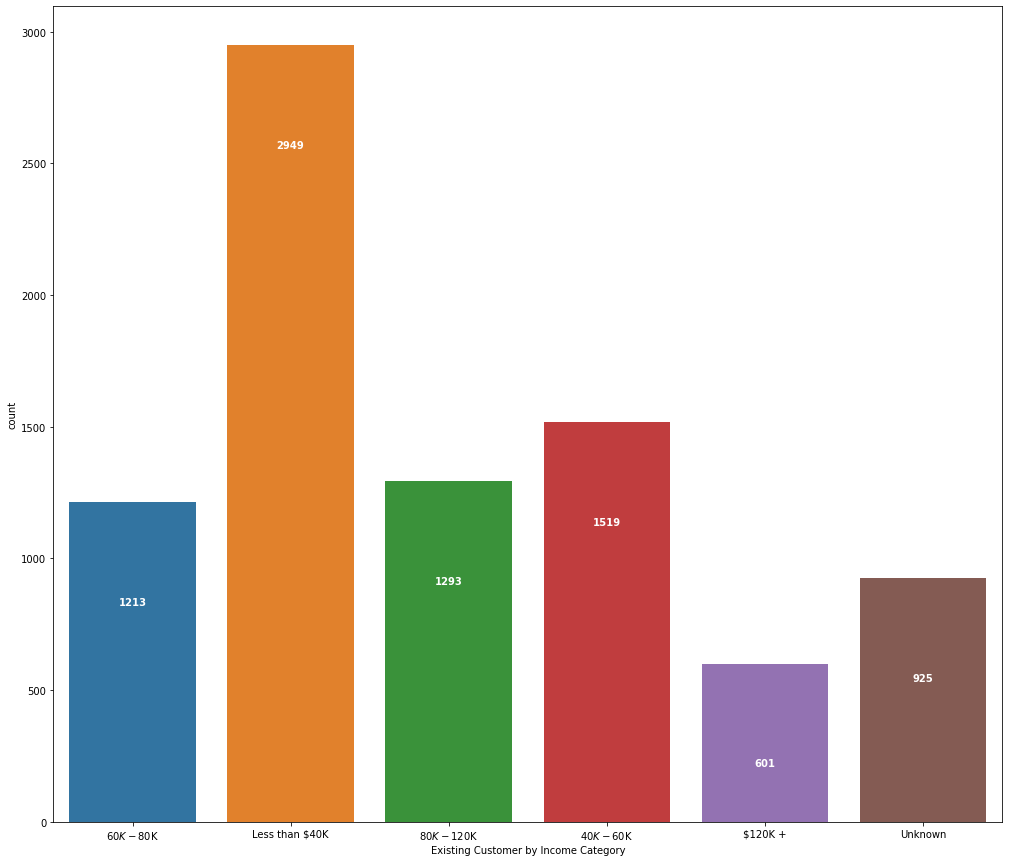

In [ ]:
# Existing customer from IC Variable
df_new = existing_data.rename(columns={'Income_Category': 'Existing Customer by Income Category'})
fig, ax = plt.subplots(1, 1, figsize=(17, 15))
sns.countplot(data=df_new, x='Existing Customer by Income Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

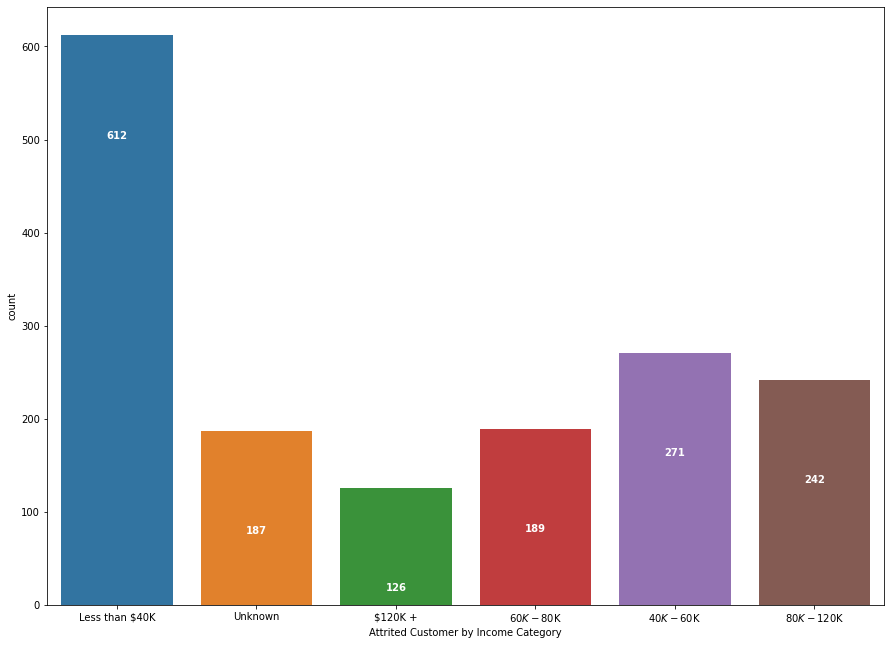

In [ ]:
# Attrited customer from IC Variable
df_new = attrited_data.rename(columns={'Income_Category': 'Attrited Customer by Income Category'})
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
sns.countplot(data=df_new, x='Attrited Customer by Income Category')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold')
plt.show()

### Card Category

In [ ]:
# Proportion of Card Category
proportion = pd.DataFrame(data['Card_Category'].value_counts())
proportion = proportion.rename(columns={'Card_Category':'Amount'})
proportion['Proportion(%)'] = data['Card_Category'].value_counts(normalize=True)
proportion = proportion.rename_axis('Card Category').reset_index()

# show the five first rows
proportion.head()

,Card Category,Amount,Proportion(%)
0,Blue,9436,0.931767
1,Silver,555,0.054804
2,Gold,116,0.011455
3,Platinum,20,0.001975


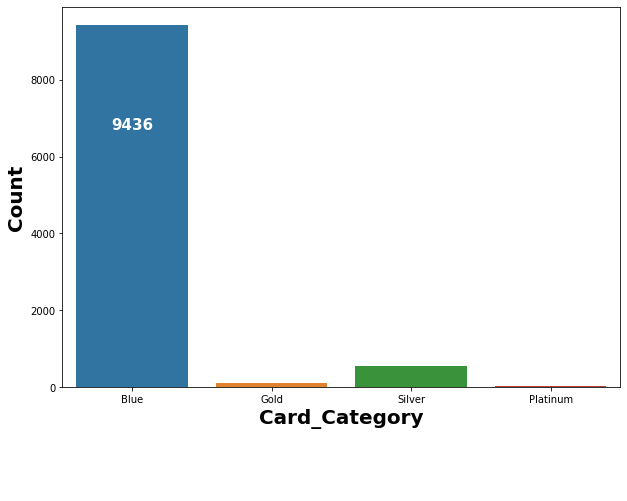

In [ ]:
#countplot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.countplot(data=data, x='Card_Category')
plt.xlabel('Card_Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Card_Category
Blue,7917
Silver,473
Gold,95
Platinum,15


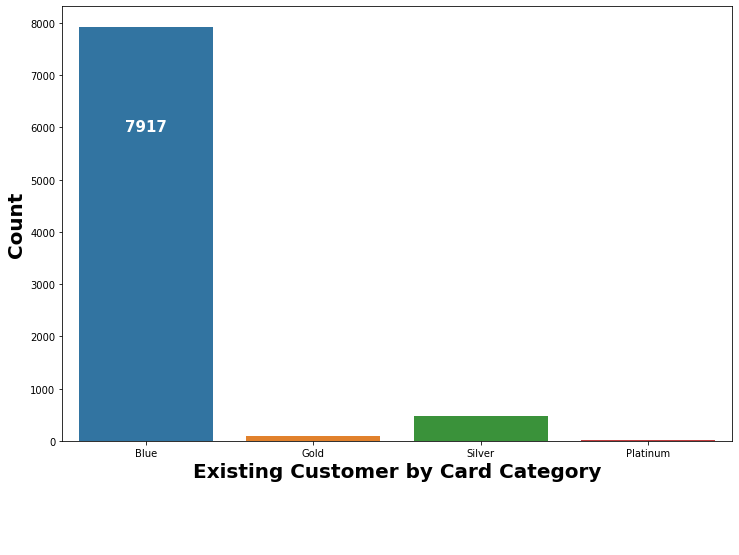

In [ ]:
# Existing customer from CC Variable
Existing_MS = pd.DataFrame(existing_data['Card_Category'].value_counts())
display(Existing_MS)
df_new = existing_data.rename(columns={'Card_Category': 'Existing Customer by Card Category'})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df_new, x='Existing Customer by Card Category')
plt.xlabel('Existing Customer by Card Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Card_Category
Blue,1519
Silver,82
Gold,21
Platinum,5


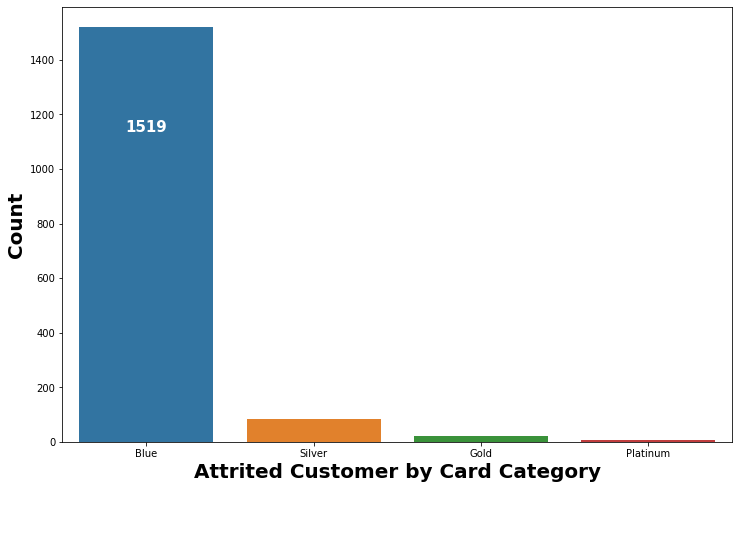

In [ ]:
# Attrited customer from CC Variable
Existing_MS = pd.DataFrame(attrited_data['Card_Category'].value_counts())
display(Existing_MS)
df_new = attrited_data.rename(columns={'Card_Category': 'Attrited Customer by Card Category'})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df_new, x='Attrited Customer by Card Category')
plt.xlabel('Attrited Customer by Card Category', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

###Dependent count

In [ ]:
# Proportion of Card Category
proportion = pd.DataFrame(data['Dependent_count'].value_counts())
proportion = proportion.rename(columns={'Dependent_count':'Amount'})
proportion['Proportion(%)'] = data['Dependent_count'].value_counts(normalize=True)
proportion = proportion.rename_axis('Dependent_count').reset_index()

# show the five first rows
display(proportion)

,Dependent_count,Amount,Proportion(%)
0,3,2732,0.269774
1,2,2655,0.262170
2,1,1838,0.181495
3,4,1574,0.155426
4,0,904,0.089266
5,5,424,0.041868


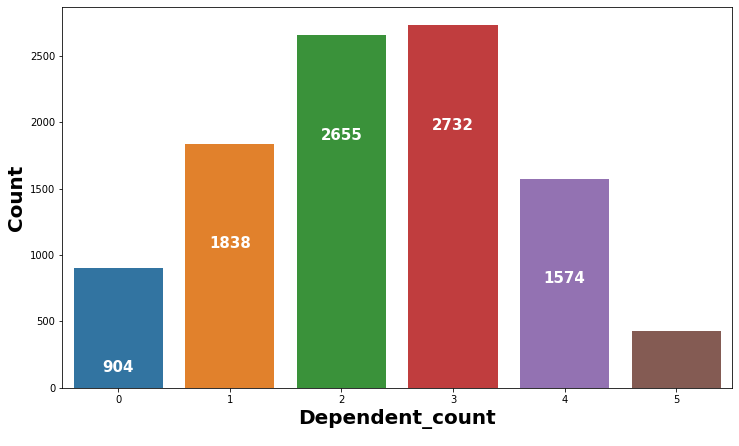

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Dependent_count',)
plt.xlabel('Dependent_count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Dependent_count
3,2250
2,2238
1,1569
4,1314
0,769
5,360


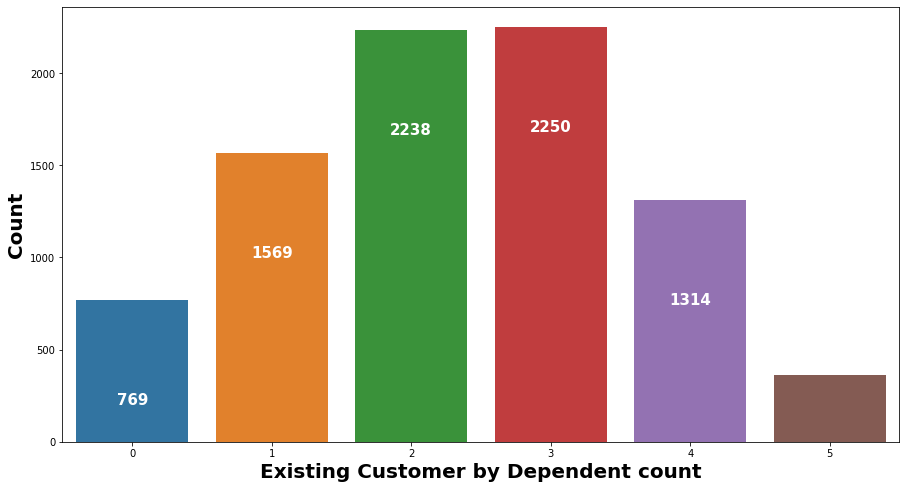

In [ ]:
# Existing customer from DC Variable
Existing_MS = pd.DataFrame(existing_data['Dependent_count'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Dependent_count': 'Existing Customer by Dependent count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Dependent count')
plt.xlabel('Existing Customer by Dependent count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Dependent_count
3,482
2,417
1,269
4,260
0,135
5,64


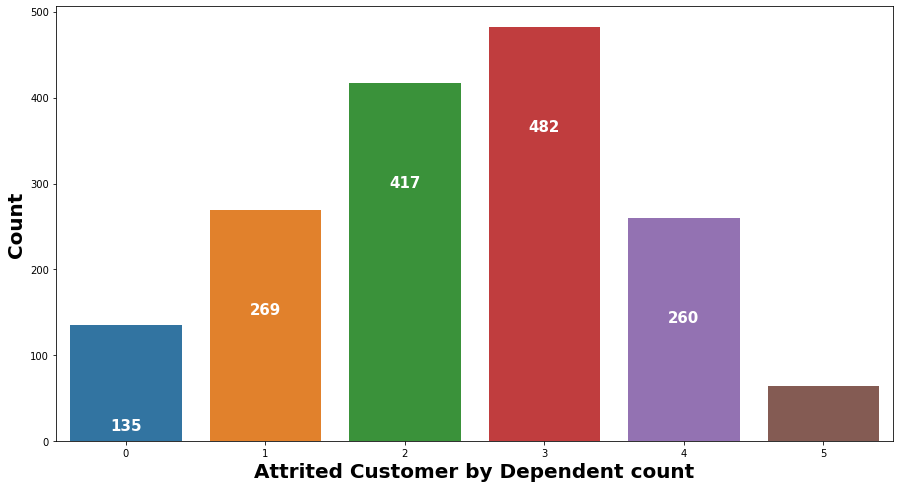

In [ ]:
# Attrited customer from DC Variable
Existing_MS = pd.DataFrame(attrited_data['Dependent_count'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Dependent_count': 'Attrited Customer by Dependent count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Dependent count')
plt.xlabel('Attrited Customer by Dependent count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

### Total relationship count

In [ ]:
# Proportion of TRC
proportion = pd.DataFrame(data['Total_Relationship_Count'].value_counts())
proportion = proportion.rename(columns={'Total_Relationship_Count':'Amount'})
proportion['Proportion(%)'] = data['Total_Relationship_Count'].value_counts(normalize=True)
proportion = proportion.rename_axis('Total_Relationship_Count').reset_index()

# show the five first rows
display(proportion)

,Total_Relationship_Count,Amount,Proportion(%)
0,3,2305,0.227609
1,4,1912,0.188802
2,5,1891,0.186729
3,6,1866,0.184260
4,2,1243,0.122741
5,1,910,0.089859


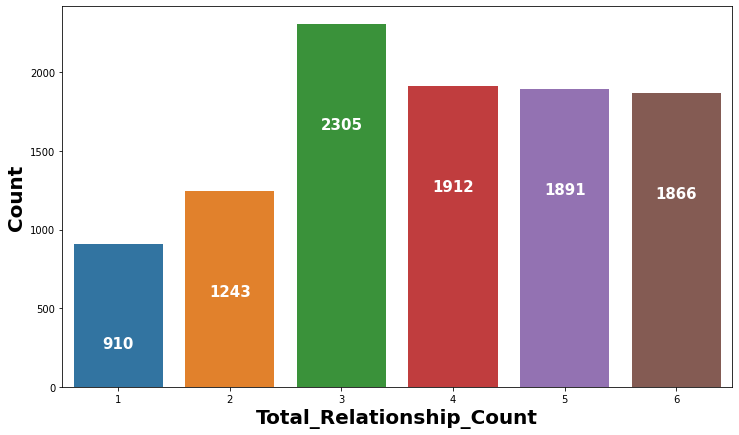

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Total_Relationship_Count',)
plt.xlabel('Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Total_Relationship_Count
3,1905
4,1687
6,1670
5,1664
2,897
1,677


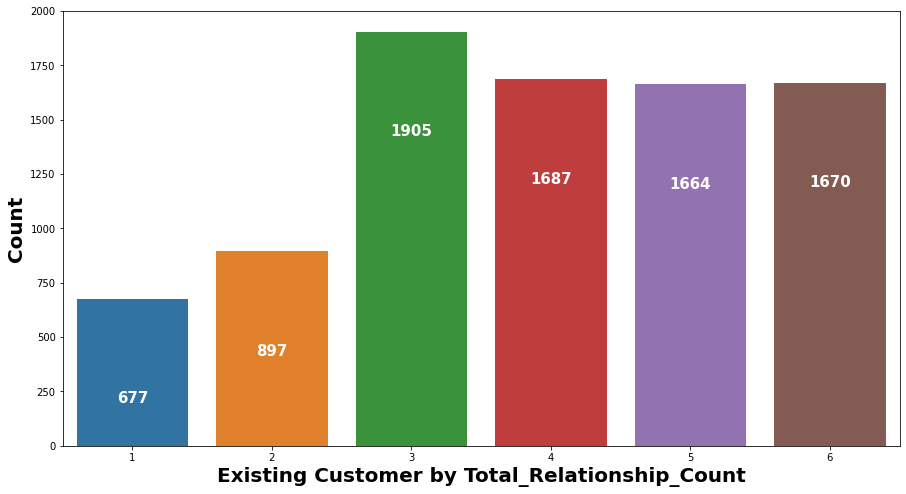

In [ ]:
# Existing customer from TRC Variable
Existing_MS = pd.DataFrame(existing_data['Total_Relationship_Count'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Total_Relationship_Count': 'Existing Customer by Total_Relationship_Count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Total_Relationship_Count')
plt.xlabel('Existing Customer by Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Total_Relationship_Count
3,400
2,346
1,233
5,227
4,225
6,196


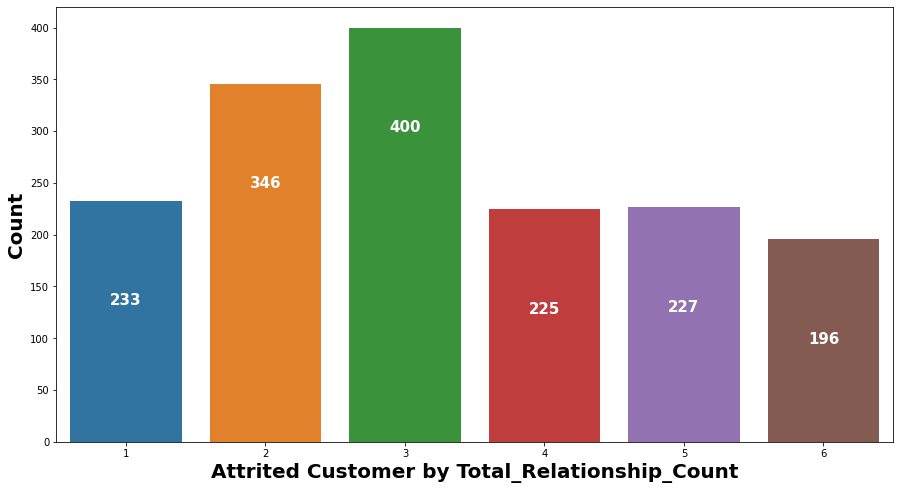

In [ ]:
# Attrited customer from TRC Variable
Existing_MS = pd.DataFrame(attrited_data['Total_Relationship_Count'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Total_Relationship_Count': 'Attrited Customer by Total_Relationship_Count'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Total_Relationship_Count')
plt.xlabel('Attrited Customer by Total_Relationship_Count', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

### Months inactive 12 month

In [ ]:
# Proportion of Months Inactive
proportion = pd.DataFrame(data['Months_Inactive_12_mon'].value_counts())
proportion = proportion.rename(columns={'Months_Inactive_12_mon':'Amount'})
proportion['Proportion(%)'] = data['Months_Inactive_12_mon'].value_counts(normalize=True)
proportion = proportion.rename_axis('Months_Inactive_12_mon').reset_index()

# show the five first rows
display(proportion)

,Months_Inactive_12_mon,Amount,Proportion(%)
0,3,3846,0.379777
1,2,3282,0.324084
2,1,2233,0.220500
3,4,435,0.042954
4,5,178,0.017577
5,6,124,0.012244
6,0,29,0.002864


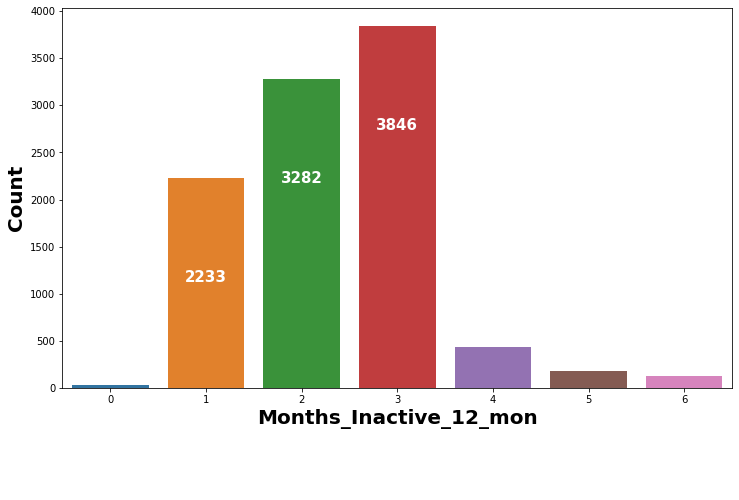

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Months_Inactive_12_mon',)
plt.xlabel('Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Months_Inactive_12_mon
3,3020
2,2777
1,2133
4,305
5,146
6,105
0,14


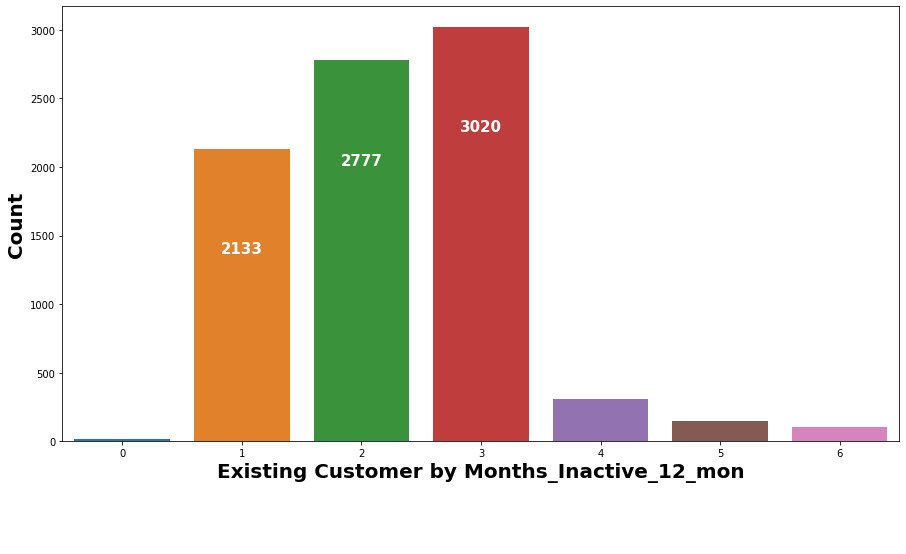

In [ ]:
# Existing customer from MI Variable
Existing_MS = pd.DataFrame(existing_data['Months_Inactive_12_mon'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Months_Inactive_12_mon': 'Existing Customer by Months_Inactive_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Months_Inactive_12_mon')
plt.xlabel('Existing Customer by Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)


,Months_Inactive_12_mon
3,826
2,505
4,130
1,100
5,32
6,19
0,15


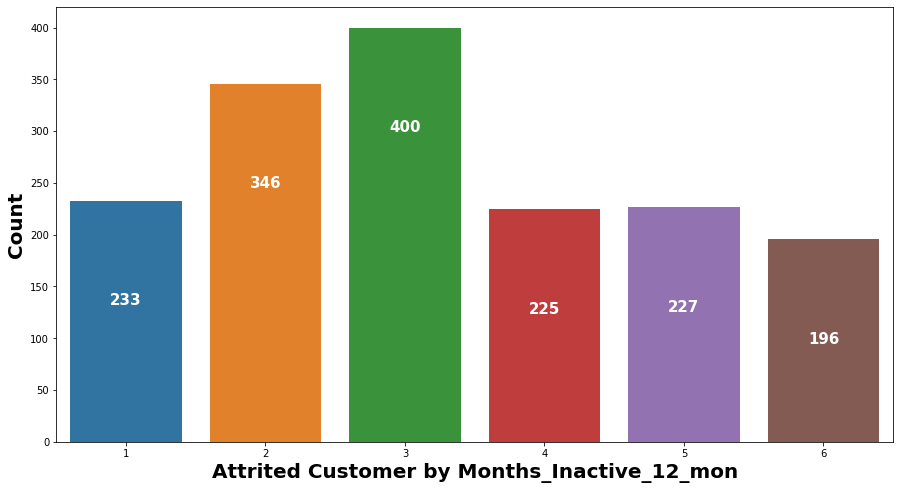

In [ ]:
# Attrited customer from MI Variable
Existing_MS = pd.DataFrame(attrited_data['Months_Inactive_12_mon'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Total_Relationship_Count': 'Attrited Customer by Months_Inactive_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Months_Inactive_12_mon')
plt.xlabel('Attrited Customer by Months_Inactive_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

###Contacts count 12 month

In [ ]:
# Proportion of CC12
proportion = pd.DataFrame(data['Contacts_Count_12_mon'].value_counts())
proportion = proportion.rename(columns={'Contacts_Count_12_mon':'Amount'})
proportion['Proportion(%)'] = data['Contacts_Count_12_mon'].value_counts(normalize=True)
proportion = proportion.rename_axis('Contacts_Count_12_mon').reset_index()

# show the five first rows
display(proportion)

,Contacts_Count_12_mon,Amount,Proportion(%)
0,3,3380,0.333761
1,2,3227,0.318653
2,1,1499,0.148020
3,4,1392,0.137454
4,0,399,0.039400
5,5,176,0.017379
6,6,54,0.005332


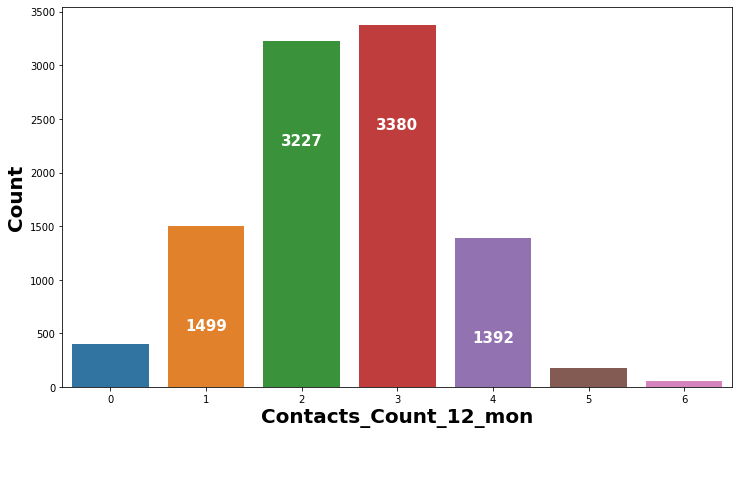

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=data, x='Contacts_Count_12_mon',)
plt.xlabel('Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Contacts_Count_12_mon
2,2824
3,2699
1,1391
4,1077
0,392
5,117


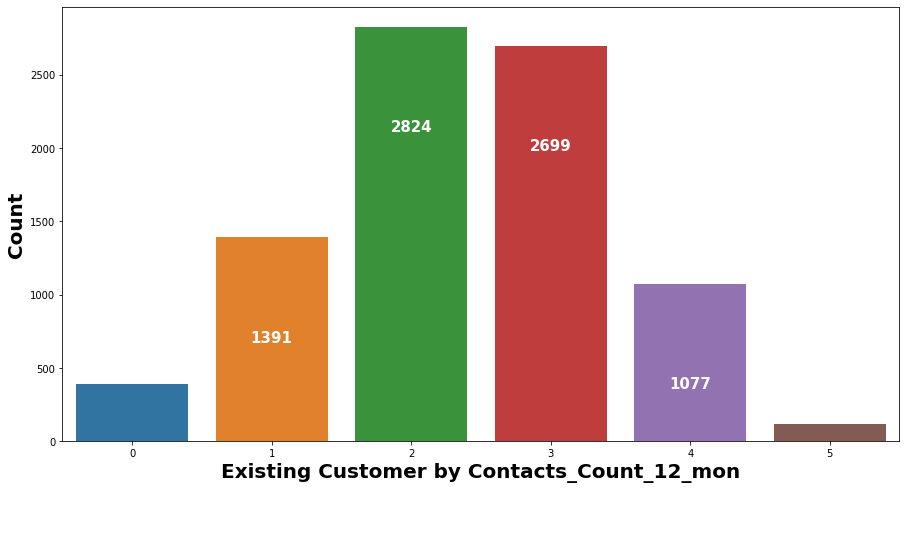

In [ ]:
# Existing customer from CC12 Variable
Existing_MS = pd.DataFrame(existing_data['Contacts_Count_12_mon'].value_counts())
display(Existing_MS)

df_new = existing_data.rename(columns={'Contacts_Count_12_mon': 'Existing Customer by Contacts_Count_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Existing Customer by Contacts_Count_12_mon')
plt.xlabel('Existing Customer by Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

,Contacts_Count_12_mon
3,681
2,403
4,315
1,108
5,59
6,54
0,7


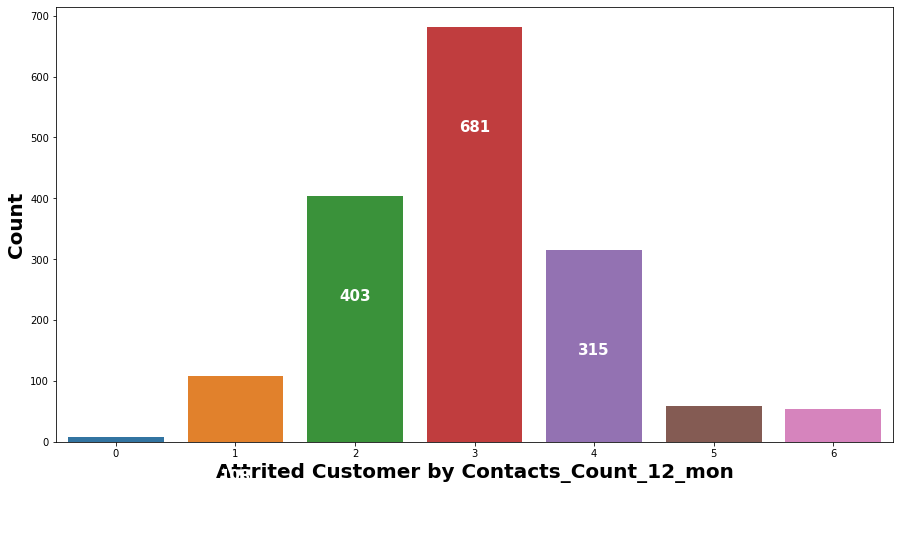

In [ ]:
# Attrited customer from CC12 Variable
Existing_MS = pd.DataFrame(attrited_data['Contacts_Count_12_mon'].value_counts())
display(Existing_MS)

df_new = attrited_data.rename(columns={'Contacts_Count_12_mon': 'Attrited Customer by Contacts_Count_12_mon'})
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.countplot(data=df_new, x='Attrited Customer by Contacts_Count_12_mon')
plt.xlabel('Attrited Customer by Contacts_Count_12_mon', fontweight='semibold', fontsize=20)
plt.ylabel('Count', fontweight='semibold', fontsize=20)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-100), textcoords='offset points', color='white', fontweight='semibold', fontsize=15)
plt.show()

#Separate dataset into two dataset in attrition_flag
* Existing customer
* Attrited customer

In [ ]:
# data.groupby(['Attrition_Flag'], as_index=True)
existing_data = data[(data.Attrition_Flag == 'Existing Customer')]
attrited_data = data[(data.Attrition_Flag == 'Attrited Customer')]
existing_data.head(), attrited_data.head()

#Z Test & T Test Credit Limit & Avg Open To Buy

##Z test

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

#Set Value
confidence_level = 0.95
alpha = 1-confidence_level
data1= data['Credit_Limit'].sample(n=150)
data2=data['Avg_Open_To_Buy'].sample(n=150)
data1_mean = np.mean(data1)
data2_mean = np.mean(data2)
print("Credit Limit mean value:",data1_mean)
print("Avg Open To Buy mean value:",data2_mean)
print('')

data1_std = np.std(data1)
data2_std = np.std(data2)
print("Credit Limit std value:",data1_std)
print("Avg Open To Buy std value:",data2_std)
print('')

#Test
ztest ,pval1 = stests.ztest(x1= data1,
                            x2=data2, 
                            value=0,alternative='two-sided')
if pval1 < 0.05:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pval1, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pval1, alpha))

## T test
H0: The average of credit limit variable is the same with the average of average open to buy variable

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

#Set Value
confidence_level = 0.95
alpha = 1-confidence_level

x1= data['Credit_Limit'].sample(n=150)
x2= data['Avg_Open_To_Buy'].sample(n=150)

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
print("Credit Limit mean value:",x1_mean)
print("Avg Open To Buy mean value:",x2_mean)
print('')

x1_std = np.std(x1)
x2_std = np.std(x2)
print("Credit Limit std value:",x1_std)
print("Avg Open To Buy std value:",x2_std)
print('')

#Test
ttest,pval = ttest_ind(x1,x2)
print("p-value",pval)
print('')

if pval < 0.05:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pval, alpha))
else :
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pval, alpha))

## Explanation


*   Dalam case ini kami lebih memilih untuk menggunakan z-test, karena jumlah sample yang digunakan >30 dan standar deviasi yang telah diketahui diawal hipotesis. Walaupun secara hasil, baik z-test maupun t-test menunjukan hasil yang kurang lebih sama.

*   Kedua metode hampir selalu menghasilkan kesimpulan yang sama yaitu menerima H0, karena kedua variabel memang memiliki korelasi yang kuat. Data Avg_Open_To_Buy didapatkan dari hasil Pengurangan Credit_Limit dengan Total_Revolving_Bal. Dimana Modus dari data Total_Revolving_Bal kebanyakan bernilai 0, sehingga data Credit_Limit dan Avg_Open_To_Buy akan memiliki nilai yang kebanyakan sama(Alasan mengapa nilai korelasi kedua variabel adalah 1)


#Relationship

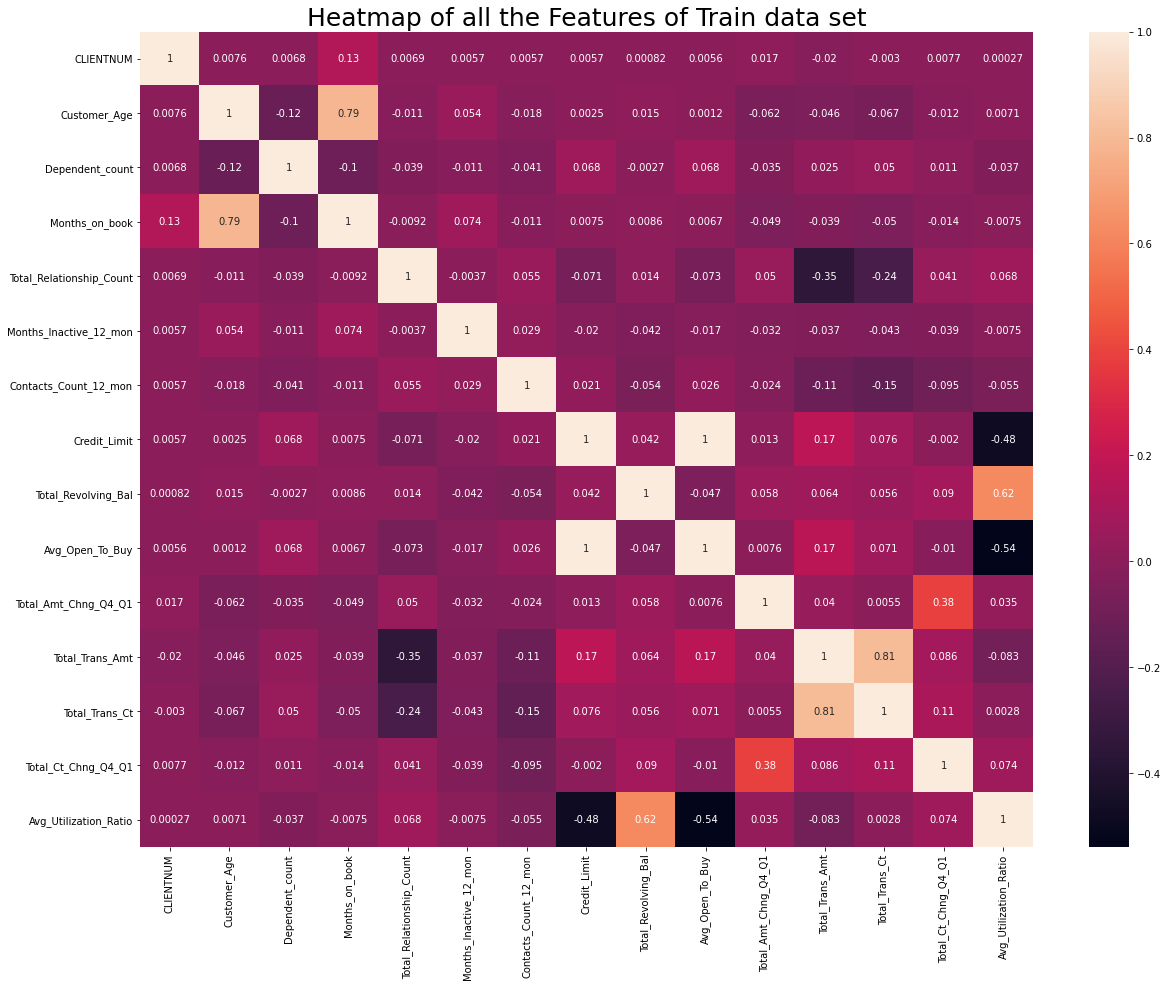

In [ ]:
# Correlation with sns heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

In [ ]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Positive Correlation :
1. month on book & customer age
2. avg utilization ratio & total revolving bal
3. total trans ct & total trans amt
4. total ct change q4 q1 & total amt change q4 q1
5. avg open to buy & credit limit

Negative Correlation :
1. total trans amt & total relationship count
2. avg utilization ratio & credit limit
3. avg utilization ratio & avg open to buy

## Boxplot

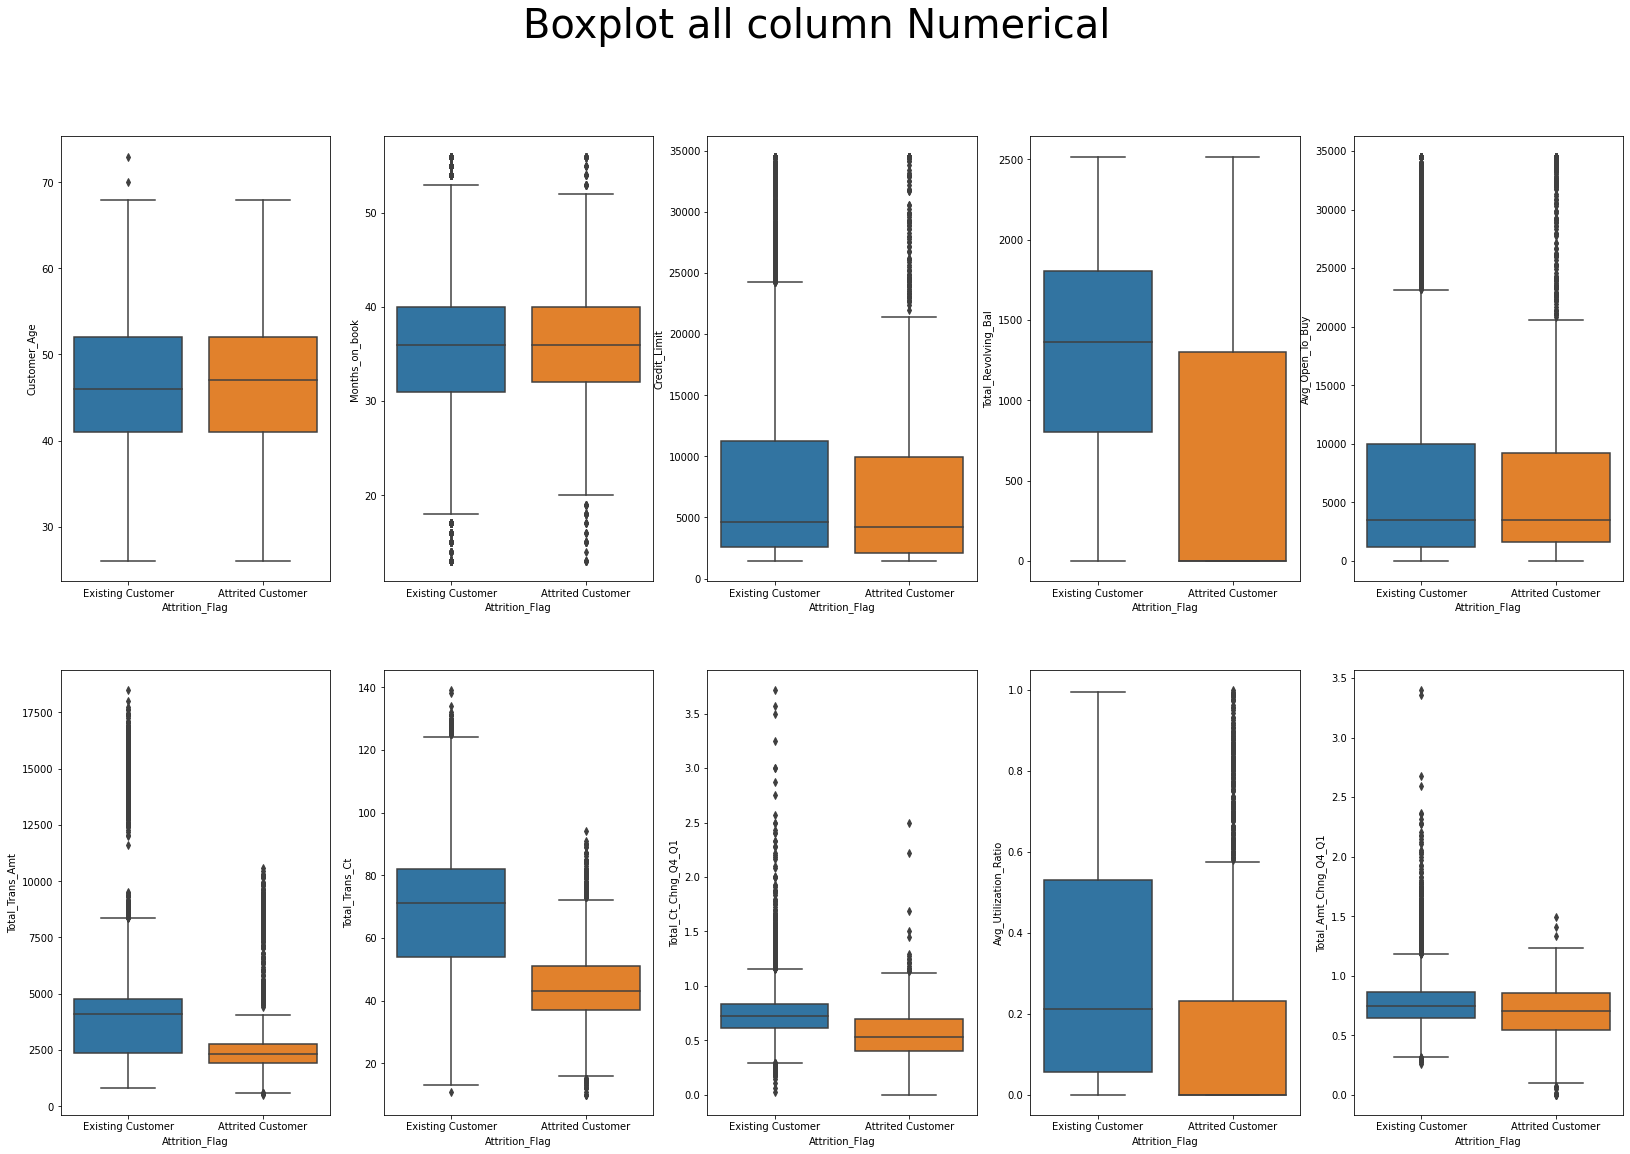

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=5, figsize=(28,18))

f.suptitle('Boxplot all column Numerical', size=40)
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=data, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data, ax=axes[0,3])
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=data, ax=axes[0,4])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=data, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=data, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=data, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=data, ax=axes[1,3])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=data, ax=axes[1,4])
plt.show()

### Outlier Data :
1. Customer Age (Existing Customer)
2. Months on book (Both)
3. Credit Limit (Both)
4. Avg open to buy (Both)
5. Total trans amt (Both)
6. Total trans ct (Both)
7. Total ct change Q4 Q1 (Both)
8. Total amt change Q4 Q1 (Both)
9. Avg utilization ratio (Attrited Customer)

### Variables with no Outlier Data :
1. Total Revolving Balance



##Regplot & Scatter Plot (Based on correlation)

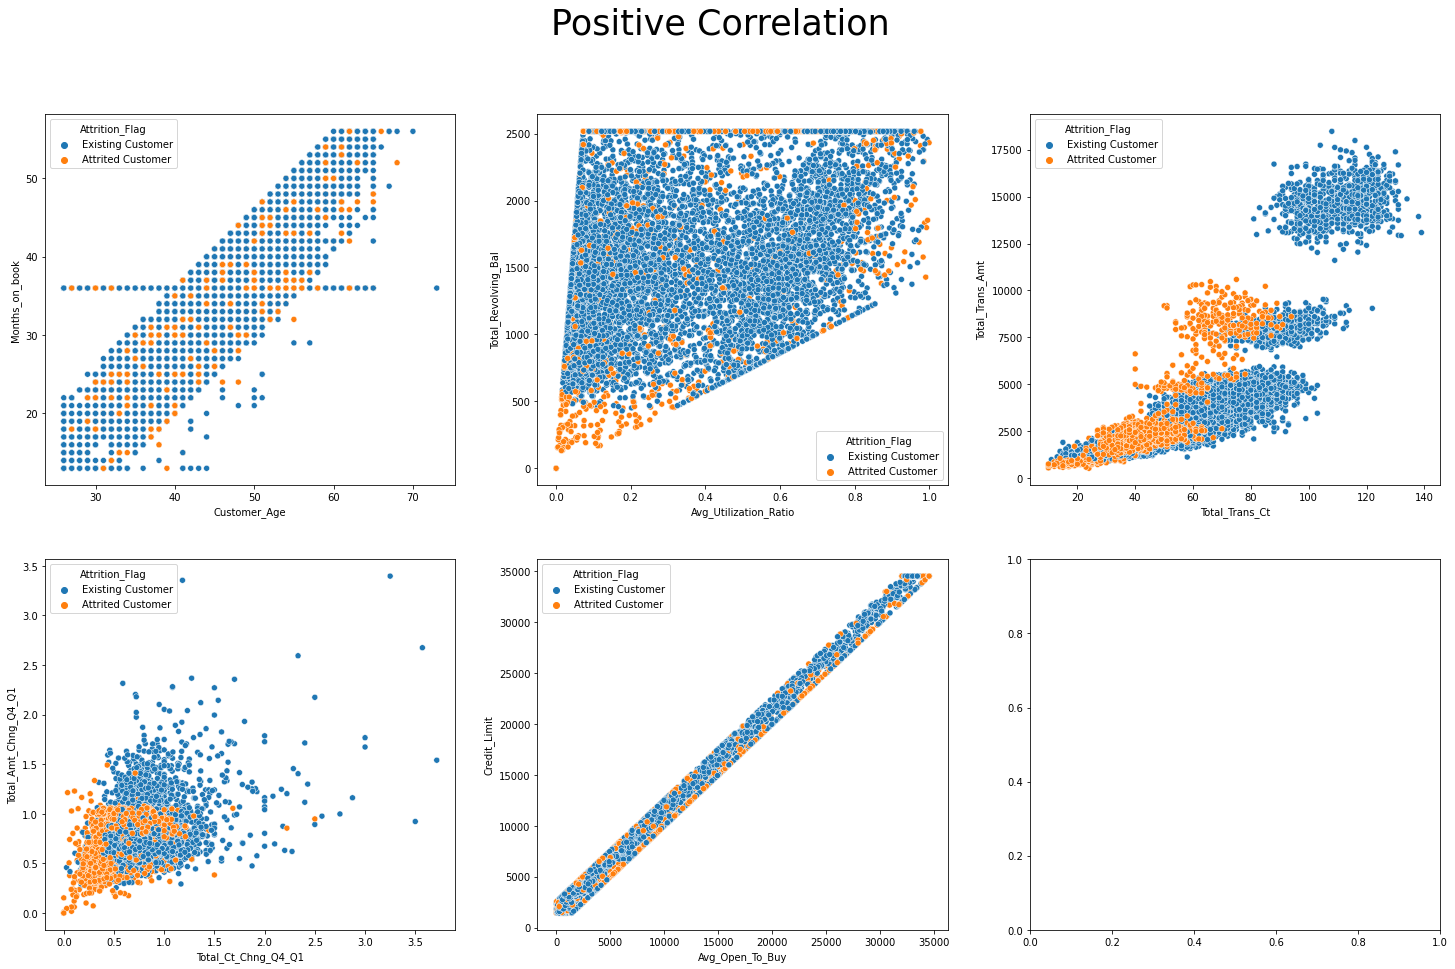

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
f.suptitle('Positive Correlation', size=35)
sns.scatterplot(x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', data=data, ax=axes[0,0])
sns.scatterplot(x='Avg_Utilization_Ratio', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data, ax=axes[0,1])
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', data=data, ax=axes[0,2])
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=data, ax=axes[1,0])
sns.scatterplot(x='Avg_Open_To_Buy', y='Credit_Limit', hue='Attrition_Flag', data=data, ax=axes[1,1])

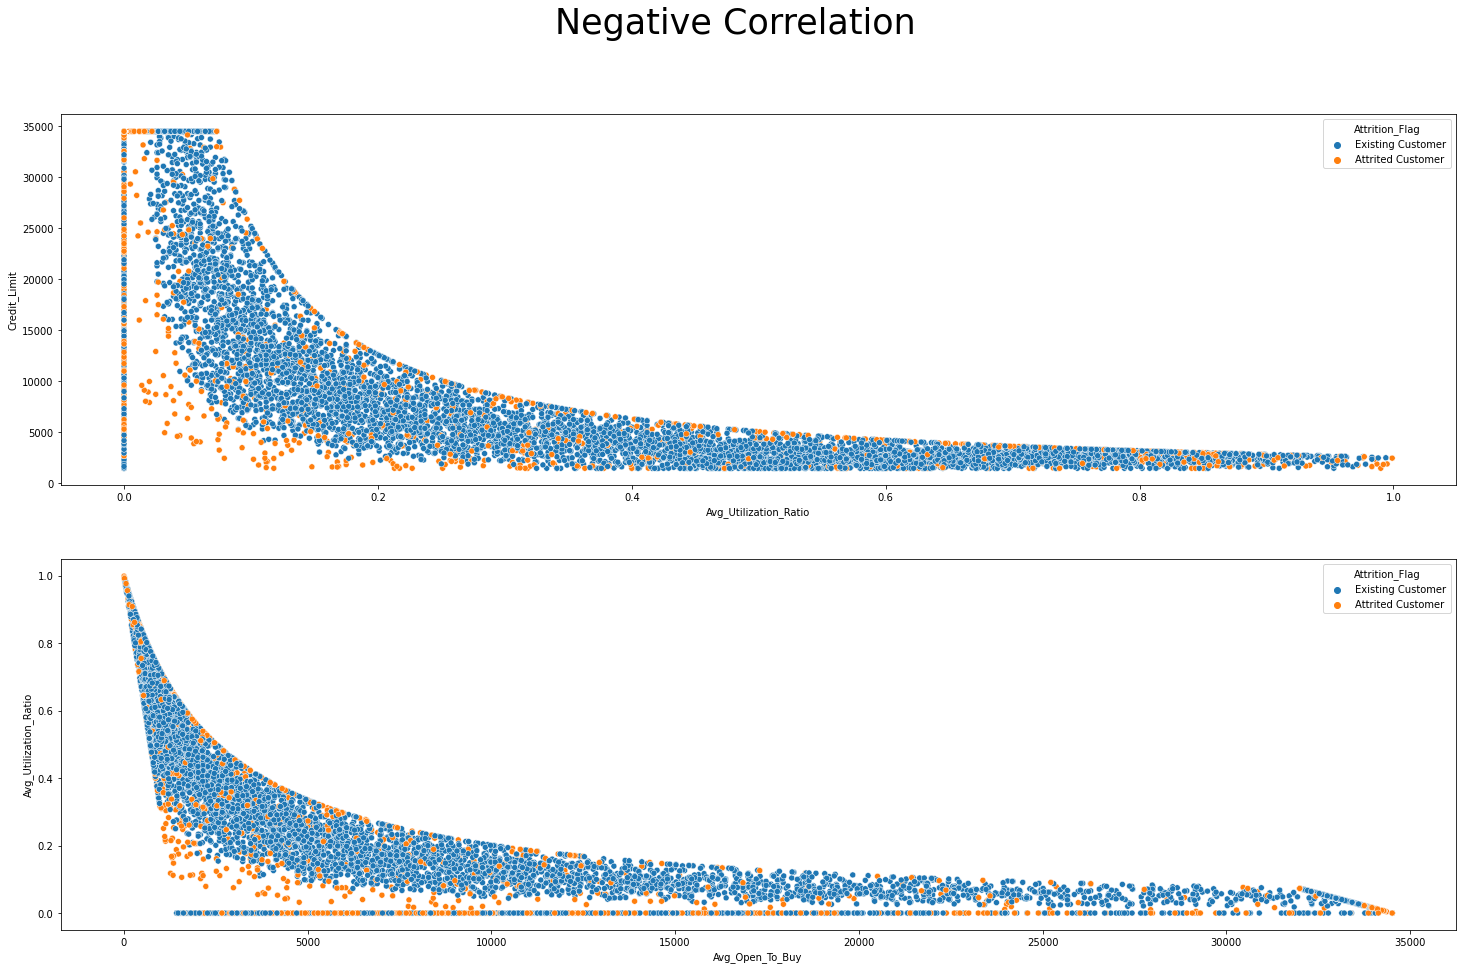

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,15))
f.suptitle('Negative Correlation', size=35)
sns.scatterplot(x='Avg_Utilization_Ratio', y='Credit_Limit', hue='Attrition_Flag', data=data, ax=axes[0])
sns.scatterplot(x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=data, ax=axes[1])